In [ ]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
coco_annotation_file = '/content/drive/MyDrive/Segment Anything/test.json'

# Load image file
image_file = '/content/drive/MyDrive/Segment Anything/composite_41.084977877603535_-88.66088955151137.jpg'

In [ ]:
coco = COCO('/content/drive/MyDrive/Segment Anything/test.json')
img_dir = '/content/drive/MyDrive/Segment Anything/image/'
image_id = 0

img = coco.imgs[image_id]
# loading annotations into memory...
# Done (t=12.70s)
# creating index...
# index created!

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


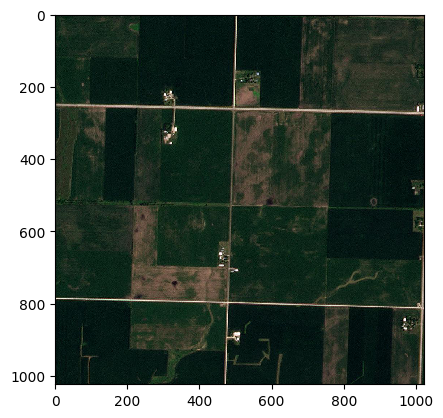

In [ ]:
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

0

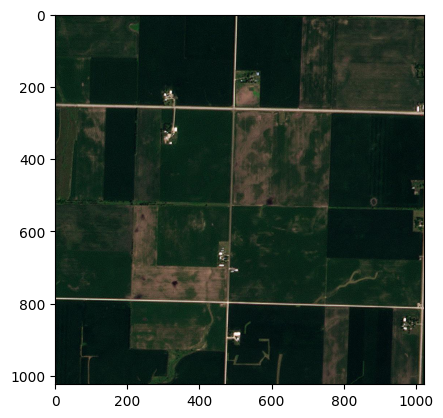

In [ ]:
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

In [ ]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)

IndexError: ignored

In [ ]:
!git clone https://github.com/luca-medeiros/lightning-sam.git
%cd lightning-sam


Cloning into 'lightning-sam'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 168 (delta 88), reused 116 (delta 47), pack-reused 0
Receiving objects: 100% (168/168), 5.76 MiB | 12.56 MiB/s, done.
Resolving deltas: 100% (88/88), done.
/content/lightning-sam


In [ ]:
!ls

config.py  dataset.py  __init__.py  losses.py  model.py  train.py  utils.py


In [ ]:
!pip install -r requirements.txt


ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


Prepare your custom COCO-format dataset. The dataset should include a JSON file with annotations and an images folder with corresponding images.

Edit src/config.py with your dataset paths.

Run src/train.py.

In [ ]:
coco = COCO('/content/drive/MyDrive/Segment Anything/test.json')
img_dir = '/content/drive/MyDrive/Segment Anything/image/'
image_id = 0


In [ ]:
import os
import sys

# Add project directory to the system path
sys.path.append('/content/lightning-sam')

# Change the current directory to src
os.chdir('/content/lightning-sam/lightning_sam')

# Run the train.py script
!python train.py


Traceback (most recent call last):
  File "/content/lightning-sam/lightning_sam/train.py", line 4, in <module>
    import lightning as L
ModuleNotFoundError: No module named 'lightning'


In [ ]:
!python train.py

python3: can't open file '/content/lightning-sam/train.py': [Errno 2] No such file or directory


## coco to yolo coco

In [ ]:
from pycocotools import coco
from pycocotools import mask as maskUtils
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Path to the COCO JSON file
json_file = '/content/drive/MyDrive/Segment Anything/IL_PS/IL_coco_new.json'

# Load the JSON data
with open(json_file, 'r') as f:
    coco_data = json.load(f)

# Access the relevant information from the loaded JSON data
images = coco_data['images']
annotations = coco_data['annotations']

# Example: Print the number of images in the dataset
num_images = len(images)
print("Number of images:", num_images)
i = 1
# Example: Print the ith annotation
ith_annotation = annotations[i]
print("ith annotation:", ith_annotation)

ith_image_Name = coco_data['images'][i]['file_name']
print("ith image:", ith_image_Name)

Number of images: 21
ith annotation: {'segmentation': [[407, 783, 314, 781, 311, 515, 403, 518]], 'point': [[368.0693596670309, 695.8028530954552]], 'label': [1], 'area': 24550.0, 'bbox': [311, 515, 96, 268], 'image_id': 0, 'category_id': 1, 'id': 1, 'iscrowd': 0}
ith image: composite_40.76802234175357_-88.91041761098417.jpg


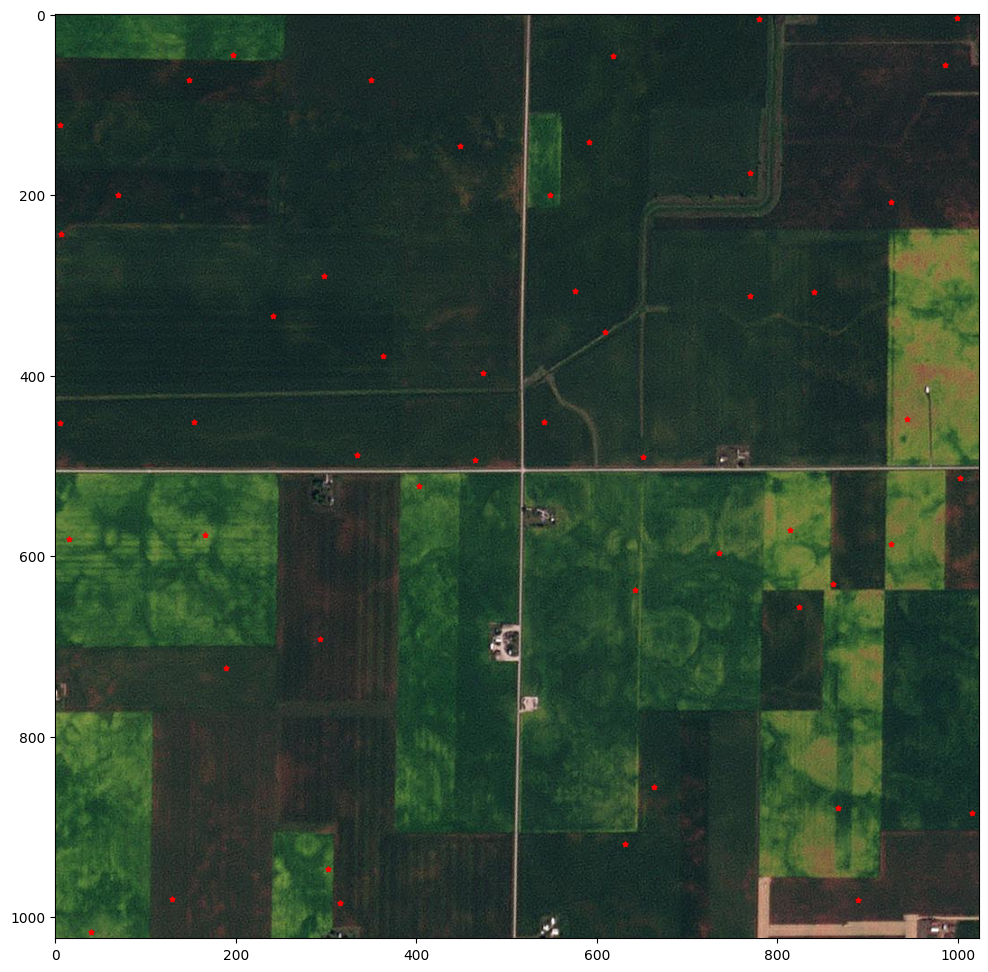

In [ ]:
anns  = coco_data['annotations']
polygons = []
color = []
plt.figure(figsize=(12,12))
image_file_path = '/content/drive/MyDrive/Segment Anything/IL_PS/'+str(i+1)+"_25/"+ith_image_Name
# image = cv2.imread(f'/content/drive/MyDrive/Segment Anything/image/composite_38.574219630205604_-88.4389042911276.jpg')
image = cv2.imread(image_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
for ann in anns:
  if ann['image_id'] ==i:
    input_value  = ann['segmentation']
    # decoded_value = mask.decode(input_value)
    x,y = ann['point'][0]
    # plt.imshow(decoded_value)
    plt.scatter(x, y, color='green', marker='*', s=12, edgecolor='red', linewidth=1.25)
# image = cv2.imread(f'/content/drive/MyDrive/Segment Anything/image/composite_38.574219630205604_-88.4389042911276.jpg')
image = cv2.imread(image_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.show()

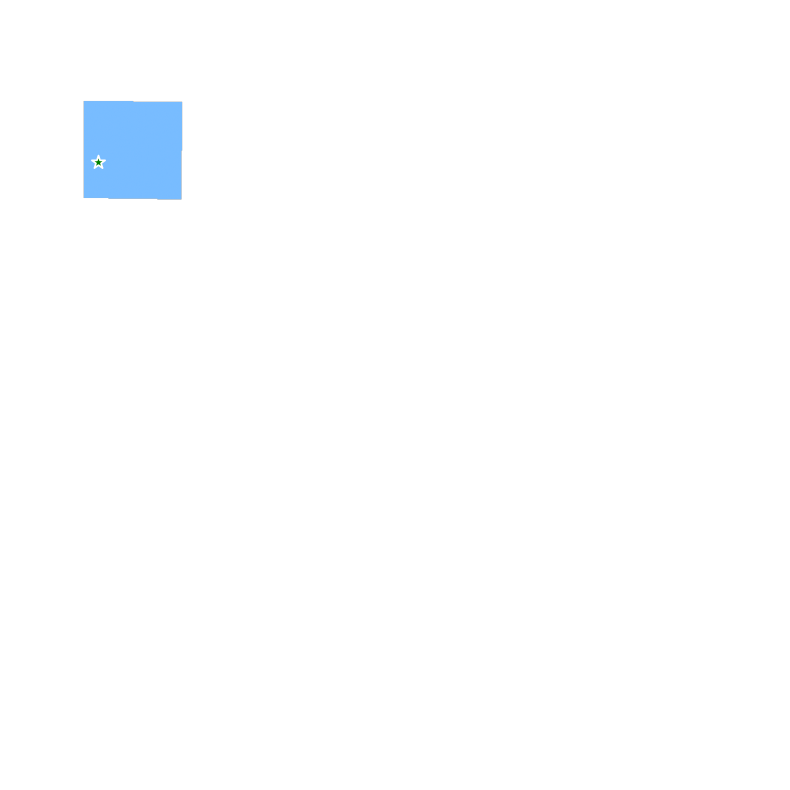

In [ ]:
def show_points(coords, labels, ax, marker_size=100):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

plt.figure(figsize=(10,10))
# plt.imshow(image)
show_mask(segmentation_mask, plt.gca())
input_point = np.array([[511, 511]])
show_points(np.array([generated_point]), np.array([1]), plt.gca())
# plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
plt.axis('off')
plt.show()



## training dataset preparation

In [ ]:
import random

def generate_point_within_segmentation(segmentation):
    while True:
        # Randomly select a polygon from the segmentation
        polygon = random.choice(segmentation)

        # Generate random coordinates within the polygon
        x = random.uniform(min(polygon[::2]), max(polygon[::2]))
        y = random.uniform(min(polygon[1::2]), max(polygon[1::2]))

        # Check if the generated coordinates are within the polygon
        if is_point_within_polygon(x, y, polygon):
            # Valid point found
            return (x, y)

def is_point_within_polygon(x, y, polygon):
    n = len(polygon) // 2
    inside = False
    j = n - 1
    for i in range(n):
        xi = polygon[2 * i]
        yi = polygon[2 * i + 1]
        xj = polygon[2 * j]
        yj = polygon[2 * j + 1]
        intersect = ((yi > y) != (yj > y)) and (x < (xj - xi) * (y - yi) / (yj - yi) + xi)
        if intersect:
            inside = not inside
        j = i
    return inside

# Example usage
segmentation_data = [{"segmentation": [[229, 122, 231, 55, 224, 49, 210, 42, 204, 36, 206, 28, 212, 27, 217, 30, 226, 27, 229, 22, 231, 16, 230, 1, 0, 1, 0, 117]]}]

segmentation = segmentation_data[0]["segmentation"]
generated_point = generate_point_within_segmentation(segmentation)
print("Generated Point:", generated_point)


Generated Point: (120.4203329422123, 106.65592225170396)


In [ ]:
import json
import math
from itertools import chain
import helper

def generate_point_within_mask(mask):
    height, width = mask.shape
    boundary_pixels = np.where(mask == 0)  # Find boundary pixels with value 0

    while True:
        # Generate random coordinates within the bounds of the mask
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)

        # Check if the generated coordinates fall within the mask and are not on the boundary
        if mask[y, x] != 0 and (y, x) not in zip(*boundary_pixels):
            # Valid point found
            return (x, y)


def vgg_to_coco(vgg_path: str, outfile: str = None, class_keyword: str = "Class"):
    with open(vgg_path) as f:
        vgg = json.load(f)

    images_ids_dict = {v["filename"]: i for i, v in enumerate(vgg.values())}
    images_info = [{"file_name": k, "id": v, "width": 1024, "height": 1024} for k, v in images_ids_dict.items()]

    categories = [{"supercategory": class_keyword, "id": 1, "name": class_keyword}]
    annotations = []
    suffix_zeros = math.ceil(math.log10(len(vgg)))

    for i, v in enumerate(vgg.values()):
        for j, r in enumerate(v["regions"]):
          if r["shape_attributes"]['name'] == 'polygon':
            x, y = r["shape_attributes"]["all_points_x"], r["shape_attributes"]["all_points_y"]
            class_name = r["region_attributes"].get(class_keyword, class_keyword)

            annotations.append({
                "segmentation": [list(chain.from_iterable(zip(x, y)))],
                "point":[generate_point_within_segmentation([list(chain.from_iterable(zip(x, y)))])],
                # "point":[[512,512]],
                        #  generate_point_within_segmentation([list(chain.from_iterable(zip(x, y)))]),
                        #  generate_point_within_segmentation([list(chain.from_iterable(zip(x, y)))]),
                        #  generate_point_within_segmentation([list(chain.from_iterable(zip(x, y)))]),
                        #  generate_point_within_segmentation([list(chain.from_iterable(zip(x, y)))]),
                        #  generate_point_within_segmentation([list(chain.from_iterable(zip(x, y)))])],
                "label":[1],
                "area": polygon_area(x, y),
                "bbox": bbox(x, y, out_format="width_height"),
                "image_id": images_ids_dict[v["filename"]],
                "category_id": 1,  # category_id set to 1 for the default class
                "id": int(f"{i:0>{suffix_zeros}}{j:0>{suffix_zeros}}"),
                "iscrowd": 0
            })

    coco = {
        "images": images_info,
        "categories": categories,
        "annotations": annotations
    }

    if outfile is None:
        outfile = vgg_path.replace(".json", "_coco.json")

    with open(outfile, "w") as f:
        json.dump(coco, f)

def polygon_area(x, y):
    # Calculate polygon area using Shoelace formula
    return 0.5 * abs(sum(x[i] * (y[i + 1] - y[i - 1]) for i in range(-1, len(x) - 1)))

def bbox(x, y, out_format="width_height"):
    xmin, ymin, xmax, ymax = min(x), min(y), max(x), max(y)

    if out_format == "width_height":
        width = xmax - xmin
        height = ymax - ymin
        return [xmin, ymin, width, height]
    elif out_format == "xmin_ymin_xmax_ymax":
        return [xmin, ymin, xmax, ymax]
    else:
        raise ValueError("Invalid out_format value. Supported values are 'width_height' and 'xmin_ymin_xmax_ymax'.")


In [ ]:
vgg_path = "/content/drive/MyDrive/Segment Anything/StudySiteTX/test_18.json"
outfile = "/content/drive/MyDrive/Segment Anything/StudySiteTX/test_18_coco.json"
vgg_to_coco(vgg_path,outfile)

In [ ]:
with open(vgg_path) as f:
    vgg = json.load(f)

In [ ]:
keys = vgg.keys()
keys_list = list(keys)
image_name = [item[:-6] for item in keys_list]

In [ ]:
source_image_folder = "/content/drive/MyDrive/Segment Anything/StudySiteTX/low_confidence_173_jpg_new/"
import shutil
import os
# Specify the destination folder
destination_folder = '/content/drive/MyDrive/Segment Anything/StudySiteTX/low_confidence_165_jpg_new/'
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
# Iterate through the jpg_list and copy each file to the destination folder

for image in image_name:
    jpg_file = source_image_folder+image
    shutil.copy(jpg_file, destination_folder)


In [ ]:
import os
import glob
from PIL import Image
import shutil
def get_jpg_shape(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        return width, height

def find_jpg_files(folder_path):
    jpg_files = []
    search_pattern = os.path.join(folder_path, '*.jpg')
    for file_path in glob.glob(search_pattern):
        if os.path.isfile(file_path):
            jpg_files.append(file_path)
    return jpg_files

result = {}
destination_folder = '/content/drive/MyDrive/Segment Anything/IL_PS/images/'
for i in range(25):
  file_name = "/content/drive/MyDrive/Segment Anything/IL_PS/"+str(i+1)+"_25/"+str(i+1)+"_25.json"
  jpg_path = find_jpg_files("/content/drive/MyDrive/Segment Anything/IL_PS/"+str(i+1)+"_25/")[0]
  image_shape = get_jpg_shape(jpg_path)
  if image_shape[0] == 1024 & image_shape[1] == 1024:
    with open(file_name) as f:
        vgg = json.load(f)
    result.update(vgg)
    # Copy the image file to the destination folder
    shutil.copy(jpg_path, destination_folder)

outfile="/content/drive/MyDrive/Segment Anything/IL_PS/IL.json"
with open(outfile, "w") as f:
  json.dump(result, f)


In [ ]:
import os
result = {}
def list_files_in_folder(folder_path):
    file_list = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_list.append(os.path.join(root, file))
    return file_list

# Replace 'folder_path' with the actual path to the folder you want to search
folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/Json'
files = list_files_in_folder(folder_path)

print(files)
for file_name in files:
    with open(file_name) as f:
        vgg = json.load(f)
    result.update(vgg)

outfile="/content/drive/MyDrive/Segment Anything/StudySiteD/Train.json"
with open(outfile, "w") as f:
  json.dump(result, f)

['/content/drive/MyDrive/Segment Anything/StudySiteD/Json/4_25_4_Revision.json', '/content/drive/MyDrive/Segment Anything/StudySiteD/Json/7_25_4_final.json', '/content/drive/MyDrive/Segment Anything/StudySiteD/Json/8_25_4_final.json', '/content/drive/MyDrive/Segment Anything/StudySiteD/Json/13_25_4_final.json', '/content/drive/MyDrive/Segment Anything/StudySiteD/Json/16_25_4_final.json', '/content/drive/MyDrive/Segment Anything/StudySiteD/Json/22_25_4_final.json', '/content/drive/MyDrive/Segment Anything/StudySiteD/Json/154re.json', '/content/drive/MyDrive/Segment Anything/StudySiteD/Json/156re.json', '/content/drive/MyDrive/Segment Anything/StudySiteD/Json/161re.json', '/content/drive/MyDrive/Segment Anything/StudySiteD/Json/166re.json', '/content/drive/MyDrive/Segment Anything/StudySiteD/Json/155_psscene_visual.json', '/content/drive/MyDrive/Segment Anything/StudySiteD/Json/158_psscene_visual.json', '/content/drive/MyDrive/Segment Anything/StudySiteD/Json/160_psscene_visual.json', '/

In [ ]:
import os
import glob
from PIL import Image
import shutil
def get_jpg_shape(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        return width, height

def find_jpg_files(folder_path):
    jpg_files = []
    search_pattern = os.path.join(folder_path, '*.jpg')
    for file_path in glob.glob(search_pattern):
        if os.path.isfile(file_path):
            jpg_files.append(file_path)
    return jpg_files

result = {}
destination_folder = '/content/drive/MyDrive/Segment Anything/IL_PS/images/'
for i in range(35):
  file_name = "/content/drive/MyDrive/Segment Anything/IL_PS/"+str(i+1)+"_25/"+str(i+1)+"_25.json"
  jpg_path = find_jpg_files("/content/drive/MyDrive/Segment Anything/IL_PS/"+str(i+1)+"_25/")[0]
  image_shape = get_jpg_shape(jpg_path)
  if image_shape[0] == 1024 & image_shape[1] == 1024:
    with open(file_name) as f:
        vgg = json.load(f)
    result.update(vgg)
    # Copy the image file to the destination folder
    shutil.copy(jpg_path, destination_folder)

outfile="/content/drive/MyDrive/Segment Anything/IL_PS/IL.json"
with open(outfile, "w") as f:
  json.dump(result, f)


In [ ]:
### copy one image from one path to a folder
import shutil
import os
for i in range(25):
  ith_image_Name = coco_data['images'][i]['file_name']
  image_file_path = '/content/drive/MyDrive/Segment Anything/IL_PS/'+str(i+1)+"_25/"+ith_image_Name
  destination_folder = '/content/drive/MyDrive/Segment Anything/IL_PS/images/'
  # Copy the image file to the destination folder
  shutil.copy(image_file_path, destination_folder)

In [ ]:
r

{'shape_attributes': {'name': 'rect',
  'x': 206,
  'y': 494,
  'width': 123,
  'height': 269},
 'region_attributes': {}}

In [ ]:
vgg_path = "/content/drive/MyDrive/Segment Anything/StudySiteD/test_224_GT.json"
outfile = "/content/drive/MyDrive/Segment Anything/StudySiteD/test_224_GT_coco.json"
vgg_to_coco(vgg_path,outfile)

In [ ]:
from pycocotools import coco
from pycocotools import mask as maskUtils
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Path to the COCO JSON file
json_file = outfile

# Load the JSON data
with open(json_file, 'r') as f:
    coco_data = json.load(f)

# Access the relevant information from the loaded JSON data
images = coco_data['images']
annotations = coco_data['annotations']

# Example: Print the number of images in the dataset
num_images = len(images)
print("Number of images:", num_images)
i = 34
# Example: Print the ith annotation
ith_annotation = annotations[i]
print("ith annotation:", ith_annotation)

ith_image_Name = coco_data['images'][i]['file_name']
print("ith image:", ith_image_Name)

Number of images: 35
ith annotation: {'segmentation': [[789, 778, 789, 951, 915, 907, 912, 777]], 'point': [[833.0439458912269, 920.2393202424854], [791.921860076302, 857.2785961826289], [790.4210156843009, 888.2317582673782], [847.055109320515, 873.3593476916379], [897.3302450993659, 878.1701516581899], [881.4177863600876, 812.2171999939216]], 'label': [1], 'area': 18895.5, 'bbox': [789, 777, 126, 174], 'image_id': 0, 'category_id': 1, 'id': 34, 'iscrowd': 0}
ith image: 36.084157053499936_-89.49500379451564_2019.0_8.0_278.7168731689.jpg


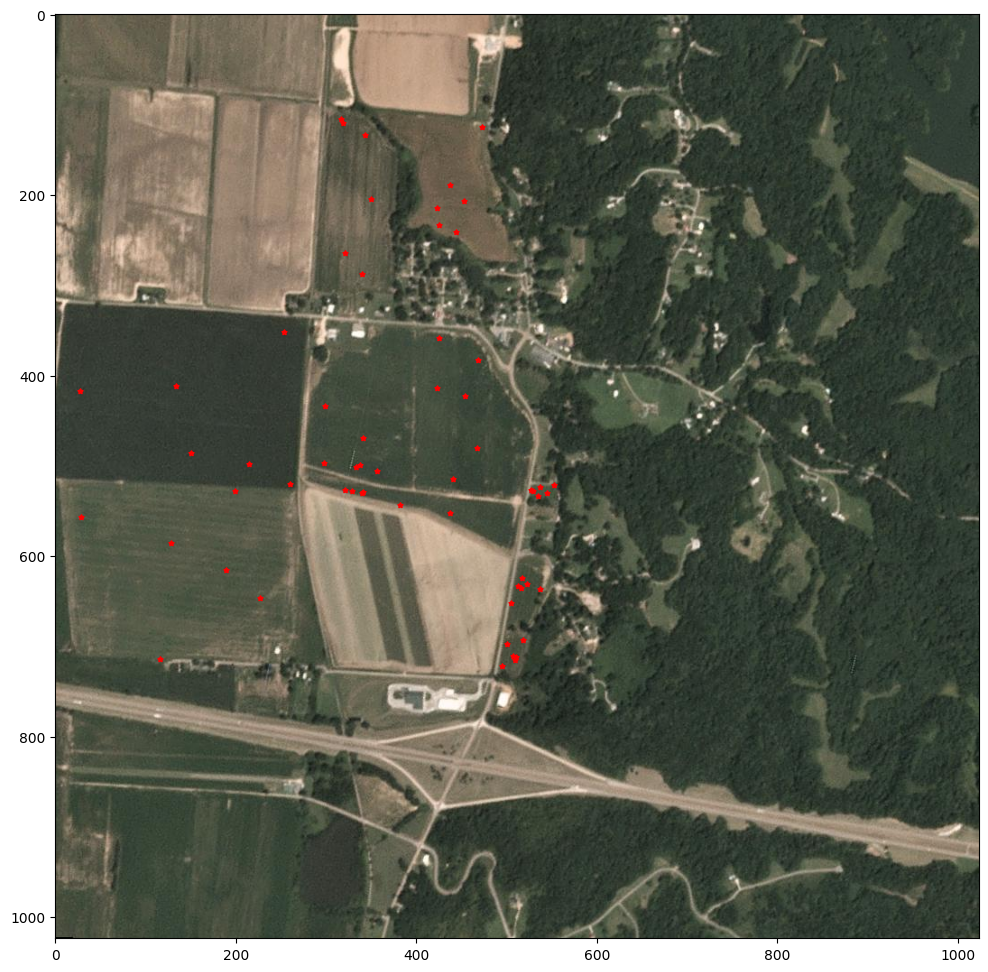

In [ ]:
anns  = coco_data['annotations']
polygons = []
color = []
plt.figure(figsize=(12,12))
image_file_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/Image/'+ith_image_Name
# image = cv2.imread(f'/content/drive/MyDrive/Segment Anything/image/composite_38.574219630205604_-88.4389042911276.jpg')
image = cv2.imread(image_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
point_prompt_list= []
for ann in anns:
  if ann['image_id'] ==i:
    input_value  = ann['segmentation']
    # decoded_value = mask.decode(input_value)
    for index in range(len(ann['point'])):
      x,y = ann['point'][index]
      point_prompt_list.append([x,y])
    # plt.imshow(decoded_value)
      plt.scatter(x, y, color='green', marker='*', s=12, edgecolor='red', linewidth=1.25)
# image = cv2.imread(f'/content/drive/MyDrive/Segment Anything/image/composite_38.574219630205604_-88.4389042911276.jpg')
image = cv2.imread(image_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.show()

## training dataset preparation (split 50 to 35 + 15)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import random

def generate_point_within_segmentation(segmentation):
    while True:
        # Randomly select a polygon from the segmentation
        polygon = random.choice(segmentation)

        # Generate random coordinates within the polygon
        x = random.uniform(min(polygon[::2]), max(polygon[::2]))
        y = random.uniform(min(polygon[1::2]), max(polygon[1::2]))

        # Check if the generated coordinates are within the polygon
        if is_point_within_polygon(x, y, polygon):
            # Valid point found
            return (x, y)

def is_point_within_polygon(x, y, polygon):
    n = len(polygon) // 2
    inside = False
    j = n - 1
    for i in range(n):
        xi = polygon[2 * i]
        yi = polygon[2 * i + 1]
        xj = polygon[2 * j]
        yj = polygon[2 * j + 1]
        intersect = ((yi > y) != (yj > y)) and (x < (xj - xi) * (y - yi) / (yj - yi) + xi)
        if intersect:
            inside = not inside
        j = i
    return inside

# Example usage
segmentation_data = [{"segmentation": [[229, 122, 231, 55, 224, 49, 210, 42, 204, 36, 206, 28, 212, 27, 217, 30, 226, 27, 229, 22, 231, 16, 230, 1, 0, 1, 0, 117]]}]

segmentation = segmentation_data[0]["segmentation"]
generated_point = generate_point_within_segmentation(segmentation)
print("Generated Point:", generated_point)


Generated Point: (31.069996417300228, 32.65683082361852)


In [ ]:
import json
import math
from itertools import chain
import helper

def generate_point_within_mask(mask):
    height, width = mask.shape
    boundary_pixels = np.where(mask == 0)  # Find boundary pixels with value 0

    while True:
        # Generate random coordinates within the bounds of the mask
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)

        # Check if the generated coordinates fall within the mask and are not on the boundary
        if mask[y, x] != 0 and (y, x) not in zip(*boundary_pixels):
            # Valid point found
            return (x, y)


def vgg_to_coco(vgg_path: str, outfile: str = None, class_keyword: str = "Class"):
    with open(vgg_path) as f:
        vgg = json.load(f)

    images_ids_dict = {v["filename"]: i for i, v in enumerate(vgg.values())}
    images_info = [{"file_name": k, "id": v, "width": 1024, "height": 1024} for k, v in images_ids_dict.items()]

    categories = [{"supercategory": class_keyword, "id": 1, "name": class_keyword}]
    annotations = []
    suffix_zeros = math.ceil(math.log10(len(vgg)))

    for i, v in enumerate(vgg.values()):
        for j, r in enumerate(v["regions"]):
          if r["shape_attributes"]['name'] == 'polygon':
            x, y = r["shape_attributes"]["all_points_x"], r["shape_attributes"]["all_points_y"]
            class_name = r["region_attributes"].get(class_keyword, class_keyword)

            annotations.append({
                "segmentation": [list(chain.from_iterable(zip(x, y)))],
                "point":[generate_point_within_segmentation([list(chain.from_iterable(zip(x, y)))])],
                        #  generate_point_within_segmentation([list(chain.from_iterable(zip(x, y)))]),
                        #  generate_point_within_segmentation([list(chain.from_iterable(zip(x, y)))]),
                        #  generate_point_within_segmentation([list(chain.from_iterable(zip(x, y)))]),
                        #  generate_point_within_segmentation([list(chain.from_iterable(zip(x, y)))]),
                        #  generate_point_within_segmentation([list(chain.from_iterable(zip(x, y)))])],
                "label":[1],
                "area": polygon_area(x, y),
                "bbox": bbox(x, y, out_format="width_height"),
                "image_id": images_ids_dict[v["filename"]],
                "category_id": 1,  # category_id set to 1 for the default class
                "id": int(f"{i:0>{suffix_zeros}}{j:0>{suffix_zeros}}"),
                "iscrowd": 0
            })

    coco = {
        "images": images_info,
        "categories": categories,
        "annotations": annotations
    }

    if outfile is None:
        outfile = vgg_path.replace(".json", "_coco.json")

    with open(outfile, "w") as f:
        json.dump(coco, f)

def polygon_area(x, y):
    # Calculate polygon area using Shoelace formula
    return 0.5 * abs(sum(x[i] * (y[i + 1] - y[i - 1]) for i in range(-1, len(x) - 1)))

def bbox(x, y, out_format="width_height"):
    xmin, ymin, xmax, ymax = min(x), min(y), max(x), max(y)

    if out_format == "width_height":
        width = xmax - xmin
        height = ymax - ymin
        return [xmin, ymin, width, height]
    elif out_format == "xmin_ymin_xmax_ymax":
        return [xmin, ymin, xmax, ymax]
    else:
        raise ValueError("Invalid out_format value. Supported values are 'width_height' and 'xmin_ymin_xmax_ymax'.")


In [ ]:
import os
import json
import numpy as np
import shutil

# Path to your folder with 50 images and the .json file
source_folder = "/content/drive/MyDrive/Segment Anything/StudySiteIL/"
image_source_folder = "/content/drive/MyDrive/Segment Anything/StudySiteIL/IL_training_50/"
train_folder = os.path.join(source_folder, "training")
test_folder = os.path.join(source_folder, "testing")

# Ensure the train and test folders exist
if not os.path.exists(train_folder):
    os.mkdir(train_folder)

if not os.path.exists(test_folder):
    os.mkdir(test_folder)

# Read the .json file
with open(os.path.join(source_folder, "All_50_json.json"), "r") as f:
    data = json.load(f)

# Get the list of image names
all_images = list(data.keys())

# Randomly select 35 images for training
np.random.shuffle(all_images)
train_images = all_images[:35]
test_images = all_images[35:]

# Prepare dictionaries for new jsons
train_json = {}
test_json = {}

for img in train_images:
  try:
    # Copy images to testing folder
    shutil.copy(os.path.join(image_source_folder, img[:-6]), train_folder)
    # Add boundary info to test json
    train_json[img] = data[img]
  except:
    # Copy images to testing folder
    shutil.copy(os.path.join(image_source_folder, img[:-5]), train_folder)
    # Add boundary info to test json
    train_json[img] = data[img]

for img in test_images:
  try:
    # Copy images to testing folder
    shutil.copy(os.path.join(image_source_folder, img[:-6]), test_folder)
    # Add boundary info to test json
    test_json[img] = data[img]
  except:
    # Copy images to testing folder
    shutil.copy(os.path.join(image_source_folder, img[:-5]), test_folder)
    # Add boundary info to test json
    test_json[img] = data[img]

# Save the new json files
with open(os.path.join(source_folder, "training.json"), "w") as f:
    json.dump(train_json, f)

with open(os.path.join(source_folder, "test.json"), "w") as f:
    json.dump(test_json, f)

print("Process complete!")


Process complete!


In [ ]:
vgg_path = os.path.join("/content/drive/MyDrive/Segment Anything/StudySiteIL/", "training.json")
vgg_path =  os.path.join("/content/drive/MyDrive/Segment Anything/StudySiteIL/", "test.json")
outfile = "/content/drive/MyDrive/Segment Anything/StudySiteIL/train_coco.json"
outfile = "/content/drive/MyDrive/Segment Anything/StudySiteIL/test_coco.json"
vgg_to_coco(vgg_path,outfile)

## light-sam

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
!pip install python-box
!pip install segment_anything
!pip install lightning==2.0.1
!pip install segmentation_models_pytorch
#pip install opencv-python
#pip install pycocotools
#pip install tensorboard



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.0/660.0 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from box import Box

config = {
    "num_devices": 1,
    "batch_size": 1,
    "num_workers": 1,
    "num_epochs": 30,
    "eval_interval": 3,
    # "out_dir": "/content/drive/MyDrive/Segment Anything/training_South",
    "out_dir": "/content/drive/MyDrive/Segment Anything/training_IL",
    "opt": {
        "learning_rate": 3e-5,
        "weight_decay": 1e-1,
        "decay_factor": 15,
        "steps": [60000, 86666],
        "warmup_steps": 10,
    },
    "model": {
        "type": 'vit_b',
        "checkpoint": "/content/drive/MyDrive/Segment Anything/sam_vit_b_01ec64.pth",
        # "checkpoint": "/content/drive/MyDrive/Segment Anything/training_South/third_try_epoch-f10.88-ckpt.pth",
        "freeze": {
            "image_encoder": False,
            # "prompt_encoder": True,
            "prompt_encoder": False,
            "mask_decoder": True,
        },
    },
    "dataset": {
        "train": {
            "root_dir": "/content/drive/MyDrive/Segment Anything/StudySiteIL/training/",
            "annotation_file": "/content/drive/MyDrive/Segment Anything/StudySiteIL/train_coco.json"
            # "root_dir": "/content/drive/MyDrive/Segment Anything/StudySiteCA/low_confidence_18_jpg/",
            # "annotation_file": "/content/drive/MyDrive/Segment Anything/StudySiteTX/test_18_coco.json"
        },
        "val": {
            "root_dir": "/content/drive/MyDrive/Segment Anything/StudySiteIL/testing/",
            "annotation_file": "/content/drive/MyDrive/Segment Anything/StudySiteIL/test_coco.json"           # "root_dir": "/content/drive/MyDrive/Segment Anything/StudySiteD/test_jpg/",
            # "annotation_file": "/content/drive/MyDrive/Segment Anything/StudySiteD/test_224_GT_coco.json"
        }
    }
}

cfg = Box(config)

In [ ]:
# from box import Box

# config = {
#     "num_devices": 1,
#     "batch_size": 2,
#     "num_workers": 4,
#     "num_epochs": 50,
#     "eval_interval": 3,
#     "out_dir": "/nobackup/yliu50/CropClassification/SAM/IL_image/images/training_point_new",
#     "opt": {
#         "learning_rate": 5e-5,
#         "weight_decay": 1e-1,
#         "decay_factor": 10,
#         "steps": [60000, 86666],
#         "warmup_steps": 10,
#     },
#     "model": {
#         "type": 'vit_h',
#         "checkpoint": "/nobackup/yliu50/CropClassification/SAM/sam_vit_h_4b8939.pth",
#         "freeze": {
#             "image_encoder": False,
#             # "image_decoder": False,
#             "prompt_encoder": True,
#             # "prompt_decoder": False,
#             # "mask_encoder": False,
#             "mask_decoder": False,
#         },
#     },
#     "dataset": {
#         "train": {
#             "root_dir": "/nobackup/yliu50/CropClassification/IL_image/images/",
#             "annotation_file": "/nobackup/yliu50/CropClassification/IL_coco_new.json"
#         },
#         "val": {
#             "root_dir": "/nobackup/yliu50/CropClassification/IL_image/images/",
#             "annotation_file": "/nobackup/yliu50/CropClassification/IL_coco_new.json"
#         }
#     }
# }

# cfg = Box(config)

# # 117017.pbspl4.nas.nasa.gov

In [ ]:
# !pip uninstall -y Pillow
# !pip install Pillow==6.2.2


Found existing installation: Pillow 9.5.0
Uninstalling Pillow-9.5.0:
  Successfully uninstalled Pillow-9.5.0


In [ ]:
import os

import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from pycocotools.coco import COCO
from segment_anything.utils.transforms import ResizeLongestSide
from torch.utils.data import DataLoader
from torch.utils.data import Dataset


# class COCODataset(Dataset):

#     def __init__(self, root_dir, annotation_file, transform=None):
#         self.root_dir = root_dir
#         self.transform = transform
#         self.coco = COCO(annotation_file)
#         self.image_ids = list(self.coco.imgs.keys())

#         # Filter out image_ids without any annotations
#         self.image_ids = [image_id for image_id in self.image_ids if len(self.coco.getAnnIds(imgIds=image_id)) > 0]

#     def __len__(self):
#         return len(self.image_ids)

#     def __getitem__(self, idx):
#         image_id = self.image_ids[idx]
#         image_info = self.coco.loadImgs(image_id)[0]
#         image_path = os.path.join(self.root_dir, image_info['file_name'])
#         image = cv2.imread(image_path)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#         ann_ids = self.coco.getAnnIds(imgIds=image_id)
#         anns = self.coco.loadAnns(ann_ids)
#         bboxes = []
#         masks = []

#         for ann in anns:
#             x, y, w, h = ann['bbox']
#             bboxes.append([x, y, x + w, y + h])
#             mask = self.coco.annToMask(ann)
#             masks.append(mask)

#         if self.transform:
#             image, masks, bboxes = self.transform(image, masks, np.array(bboxes))

#         bboxes = np.stack(bboxes, axis=0)
#         masks = np.stack(masks, axis=0)
#         return image, torch.tensor(bboxes), torch.tensor(masks).float()


class COCODataset(Dataset):

    def __init__(self, root_dir, annotation_file, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.coco = COCO(annotation_file)
        self.image_ids = list(self.coco.imgs.keys())

        # Filter out image_ids without any annotations
        self.image_ids = [image_id for image_id in self.image_ids if len(self.coco.getAnnIds(imgIds=image_id)) > 0]

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        image_info = self.coco.loadImgs(image_id)[0]
        image_path = os.path.join(self.root_dir, image_info['file_name'])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ann_ids = self.coco.getAnnIds(imgIds=image_id)
        anns = self.coco.loadAnns(ann_ids)
        bboxes = []
        masks = []
        points = []
        labels = []
        for ann in anns:
            x, y, w, h = ann['bbox']
            bboxes.append([x, y, x + w, y + h])
            mask = self.coco.annToMask(ann)
            masks.append(mask)
            point = ann["point"]
            label = ann["label"]
            points.append(point)
            labels.append(label)

        if self.transform:
            image, masks, bboxes = self.transform(image, masks, np.array(bboxes))

        bboxes = np.stack(bboxes, axis=0)
        masks = np.stack(masks, axis=0)
        points = np.stack(points, axis=0)
        labels = np.stack(labels, axis=0)
        return image, (torch.tensor(points),torch.tensor(labels)), torch.tensor(masks).float()


def collate_fn(batch):
    images, bboxes, masks = zip(*batch)
    images = torch.stack(images)
    return images, bboxes, masks


class ResizeAndPad:

    def __init__(self, target_size):
        self.target_size = target_size
        self.transform = ResizeLongestSide(target_size)
        self.to_tensor = transforms.ToTensor()

    def __call__(self, image, masks, bboxes):
        # Resize image and masks
        og_h, og_w, _ = image.shape
        image = self.transform.apply_image(image)
        masks = [torch.tensor(self.transform.apply_image(mask)) for mask in masks]
        image = self.to_tensor(image)

        # Pad image and masks to form a square
        _, h, w = image.shape
        max_dim = max(w, h)
        pad_w = (max_dim - w) // 2
        pad_h = (max_dim - h) // 2

        padding = (pad_w, pad_h, max_dim - w - pad_w, max_dim - h - pad_h)
        image = transforms.Pad(padding)(image)
        masks = [transforms.Pad(padding)(mask) for mask in masks]

        # Adjust bounding boxes
        bboxes = self.transform.apply_boxes(bboxes, (og_h, og_w))
        bboxes = [[bbox[0] + pad_w, bbox[1] + pad_h, bbox[2] + pad_w, bbox[3] + pad_h] for bbox in bboxes]

        return image, masks, bboxes



def load_datasets(cfg, img_size):
    transform = ResizeAndPad(img_size)
    train = COCODataset(root_dir=cfg.dataset.train.root_dir,
                        annotation_file=cfg.dataset.train.annotation_file,
                        transform=transform)
    val = COCODataset(root_dir=cfg.dataset.val.root_dir,
                      annotation_file=cfg.dataset.val.annotation_file,
                      transform=transform)
    train_dataloader = DataLoader(train,
                                  batch_size=cfg.batch_size,
                                  shuffle=True,
                                  num_workers=cfg.num_workers,
                                  collate_fn=collate_fn)
    val_dataloader = DataLoader(val,
                                batch_size=cfg.batch_size,
                                shuffle=True,
                                num_workers=cfg.num_workers,
                                collate_fn=collate_fn)
    return train_dataloader, val_dataloader

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

ALPHA = 0.8
GAMMA = 2


class FocalLoss(nn.Module):

    def __init__(self, weight=None, size_average=True):
        super().__init__()

    def forward(self, inputs, targets, alpha=ALPHA, gamma=GAMMA, smooth=1):
        inputs = F.sigmoid(inputs)
        inputs = torch.clamp(inputs, min=0, max=1)
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        BCE_EXP = torch.exp(-BCE)
        focal_loss = alpha * (1 - BCE_EXP)**gamma * BCE

        return focal_loss


class DiceLoss(nn.Module):

    def __init__(self, weight=None, size_average=True):
        super().__init__()

    # def forward(self, inputs, targets, smooth=1e-7):
    def forward(self, inputs, targets, smooth=1):
        inputs = F.sigmoid(inputs)
        inputs = torch.clamp(inputs, min=0, max=1)
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        intersection = (inputs * targets).sum()
        dice = (2. * intersection + smooth) / (inputs.sum() + targets.sum() + smooth)

        return 1 - dice


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from segment_anything import sam_model_registry
from segment_anything import SamPredictor


class Model(nn.Module):

    def __init__(self, cfg):
        super().__init__()
        self.cfg = cfg

    def setup(self):
        self.model = sam_model_registry[self.cfg.model.type](checkpoint=self.cfg.model.checkpoint)
        self.model.train()
        if self.cfg.model.freeze.image_encoder:
            for param in self.model.image_encoder.parameters():
                param.requires_grad = False
        if self.cfg.model.freeze.prompt_encoder:
            for param in self.model.prompt_encoder.parameters():
                param.requires_grad = False
        if self.cfg.model.freeze.mask_decoder:
            for param in self.model.mask_decoder.parameters():
                param.requires_grad = False

    def forward(self, images, bboxes):
        _, _, H, W = images.shape
        image_embeddings = self.model.image_encoder(images)
        pred_masks = []
        ious = []
        for embedding, bbox in zip(image_embeddings, bboxes):
            sparse_embeddings, dense_embeddings = self.model.prompt_encoder(
                points=bbox,
                boxes=None,
                # boxes=bbox,
                masks=None,
            )

            low_res_masks, iou_predictions = self.model.mask_decoder(
                image_embeddings=embedding.unsqueeze(0),
                image_pe=self.model.prompt_encoder.get_dense_pe(),
                sparse_prompt_embeddings=sparse_embeddings,
                dense_prompt_embeddings=dense_embeddings,
                multimask_output=False,
            )

            masks = F.interpolate(
                low_res_masks,
                (H, W),
                mode="bilinear",
                align_corners=False,
            )
            pred_masks.append(masks.squeeze(1))
            ious.append(iou_predictions)

        return pred_masks, ious

    def get_predictor(self):
        return SamPredictor(self.model)

In [ ]:
import os

import cv2
import torch
from box import Box
from torchvision.utils import draw_bounding_boxes
from torchvision.utils import draw_segmentation_masks
from tqdm import tqdm


class AverageMeter:
    """Computes and stores the average and current value."""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def calc_iou(pred_mask: torch.Tensor, gt_mask: torch.Tensor):
    pred_mask = (pred_mask >= 0.5).float()
    intersection = torch.sum(torch.mul(pred_mask, gt_mask), dim=(1, 2))
    union = torch.sum(pred_mask, dim=(1, 2)) + torch.sum(gt_mask, dim=(1, 2)) - intersection
    epsilon = 1e-7
    batch_iou = intersection / (union + epsilon)

    batch_iou = batch_iou.unsqueeze(1)
    return batch_iou

def calc_f1(pred_mask: torch.Tensor, gt_mask: torch.Tensor):
    pred_mask = (pred_mask >= 0.5).float()
    intersection = torch.sum(torch.mul(pred_mask, gt_mask), dim=(1, 2))
    union = torch.sum(pred_mask, dim=(1, 2)) + torch.sum(gt_mask, dim=(1, 2)) - intersection
    epsilon = 1e-7
    f1 = 2*intersection / (union + epsilon + intersection)
    f1 = f1.unsqueeze(1)
    return f1

# def draw_image(image, masks, boxes, labels, alpha=0.4):
#     image = torch.from_numpy(image).permute(2, 0, 1)
#     if boxes is not None:
#         image = draw_bounding_boxes(image, boxes, colors=['red'] * len(boxes), labels=labels, width=2)
#     if masks is not None:
#         image = draw_segmentation_masks(image, masks=masks, colors=['red'] * len(masks), alpha=alpha)
#     return image.numpy().transpose(1, 2, 0)


# def visualize(cfg: Box):
#     model = Model(cfg)
#     model.setup()
#     model.eval()
#     model.cuda()
#     dataset = COCODataset(root_dir=cfg.dataset.val.root_dir,
#                           annotation_file=cfg.dataset.val.annotation_file,
#                           transform=None)
#     predictor = model.get_predictor()
#     os.makedirs(cfg.out_dir, exist_ok=True)

#     for image_id in tqdm(dataset.image_ids):
#         image_info = dataset.coco.loadImgs(image_id)[0]
#         image_path = os.path.join(dataset.root_dir, image_info['file_name'])
#         image_output_path = os.path.join(cfg.out_dir, image_info['file_name'])
#         image = cv2.imread(image_path)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         ann_ids = dataset.coco.getAnnIds(imgIds=image_id)
#         anns = dataset.coco.loadAnns(ann_ids)
#         bboxes = []
#         for ann in anns:
#             x, y, w, h = ann['bbox']
#             bboxes.append([x, y, x + w, y + h])
#         bboxes = torch.as_tensor(bboxes, device=model.model.device)
#         transformed_boxes = predictor.transform.apply_boxes_torch(bboxes, image.shape[:2])
#         predictor.set_image(image)
#         masks, _, _ = predictor.predict_torch(
#             point_coords=None,
#             point_labels=None,
#             boxes=transformed_boxes,
#             multimask_output=False,
#         )
#         image_output = draw_image(image, masks.squeeze(1), boxes=None, labels=None)
#         cv2.imwrite(image_output_path, image_output)


# if __name__ == "__main__":
#     visualize(cfg)

In [ ]:
torch.set_float32_matmul_precision('high')


def validate(fabric: L.Fabric, model: Model, val_dataloader: DataLoader, epoch: int = 0):
    model.eval()
    ious = AverageMeter()
    f1_scores = AverageMeter()

    with torch.no_grad():
        for iter, data in enumerate(val_dataloader):
            images, bboxes, gt_masks = data
            # images, points,labels, gt_masks = data
            num_images = images.size(0)
            pred_masks, _ = model(images, bboxes)
            for pred_mask, gt_mask in zip(pred_masks, gt_masks):
                batch_stats = smp.metrics.get_stats(
                    pred_mask,
                    gt_mask.int(),
                    mode='binary',
                    threshold=0.5,
                )
                batch_iou = smp.metrics.iou_score(*batch_stats, reduction="micro-imagewise")
                batch_f1 = smp.metrics.f1_score(*batch_stats, reduction="micro-imagewise")
                ious.update(batch_iou, num_images)
                f1_scores.update(batch_f1, num_images)
            fabric.print(
                f'Val: [{epoch}] - [{iter}/{len(val_dataloader)}]: Mean IoU: [{ious.avg:.4f}] -- Mean F1: [{f1_scores.avg:.4f}]'
            )

    fabric.print(f'Validation [{epoch}]: Mean IoU: [{ious.avg:.4f}] -- Mean F1: [{f1_scores.avg:.4f}]')

    fabric.print(f"Saving checkpoint to {cfg.out_dir}")
    state_dict = model.model.state_dict()
    if fabric.global_rank == 0:
        torch.save(state_dict, os.path.join(cfg.out_dir, f"epoch-{epoch:06d}-f1{f1_scores.avg:.2f}-ckpt.pth"))
    model.train()

In [ ]:
from box import Box

config = {
    "num_devices": 1,
    "batch_size": 2,
    "num_workers": 4,
    "num_epochs": 50,
    "eval_interval": 3,
    "out_dir": "/content/drive/MyDrive/Segment Anything/training_South",
    "opt": {
        "learning_rate": 5e-7,
        "weight_decay": 1e-1,
        "decay_factor": 15,
        "steps": [60000, 86666],
        "warmup_steps": 10,
    },
    "model": {
        "type": 'vit_b',
        "checkpoint": "/content/drive/MyDrive/Segment Anything/sam_vit_b_01ec64.pth",
        "freeze": {
            "image_encoder": False,
            "prompt_encoder": True,
            "mask_decoder": True,
        },
    },
    "dataset": {
        "train": {
            "root_dir": "/content/drive/MyDrive/Segment Anything/StudySiteD/Image/",
            "annotation_file": "/content/drive/MyDrive/Segment Anything/StudySiteD/Train_new_coco.json"
        },
        "val": {
            "root_dir": "/content/drive/MyDrive/Segment Anything/StudySiteD/Image2/",
            "annotation_file": "/content/drive/MyDrive/Segment Anything/StudySiteD/Test_coco.json"
        }
    }
}

cfg = Box(config)

In [ ]:
import os
import time

import lightning as L
import segmentation_models_pytorch as smp
import torch
import torch.nn.functional as F
from box import Box
# from config import cfg
# from dataset import load_datasets
from lightning.fabric.fabric import _FabricOptimizer
from lightning.fabric.loggers import TensorBoardLogger
# from losses import DiceLoss
# from losses import FocalLoss
# from model import Model
from torch.utils.data import DataLoader
# from utils import AverageMeter
# from utils import calc_iou

torch.set_float32_matmul_precision('high')


def validate(fabric: L.Fabric, model: Model, val_dataloader: DataLoader, epoch: int = 0):
    model.eval()
    ious = AverageMeter()
    f1_scores = AverageMeter()

    with torch.no_grad():
        for iter, data in enumerate(val_dataloader):
            images, bboxes, gt_masks = data
            # images, points,labels, gt_masks = data
            num_images = images.size(0)
            pred_masks, _ = model(images, bboxes)
            for pred_mask, gt_mask in zip(pred_masks, gt_masks):
                batch_stats = smp.metrics.get_stats(
                    pred_mask,
                    gt_mask.int(),
                    mode='binary',
                    threshold=0.5,
                )
                batch_iou = smp.metrics.iou_score(*batch_stats, reduction="micro-imagewise")
                batch_f1 = smp.metrics.f1_score(*batch_stats, reduction="micro-imagewise")
                ious.update(batch_iou, num_images)
                f1_scores.update(batch_f1, num_images)
            fabric.print(
                f'Val: [{epoch}] - [{iter}/{len(val_dataloader)}]: Mean IoU: [{ious.avg:.4f}] -- Mean F1: [{f1_scores.avg:.4f}]'
            )

    fabric.print(f'Validation [{epoch}]: Mean IoU: [{ious.avg:.4f}] -- Mean F1: [{f1_scores.avg:.4f}]')

    fabric.print(f"Saving checkpoint to {cfg.out_dir}")
    state_dict = model.model.state_dict()
    if fabric.global_rank == 0:
        torch.save(state_dict, os.path.join(cfg.out_dir, f"epoch-{epoch:06d}-f1{f1_scores.avg:.2f}-ckpt.pth"))
    model.train()


def train_sam(
    cfg: Box,
    fabric: L.Fabric,
    model: Model,
    optimizer: _FabricOptimizer,
    scheduler: _FabricOptimizer,
    train_dataloader: DataLoader,
    val_dataloader: DataLoader,
):
    """The SAM training loop."""

    focal_loss = FocalLoss()
    dice_loss = DiceLoss()

    for epoch in range(1, cfg.num_epochs):
        batch_time = AverageMeter()
        data_time = AverageMeter()
        focal_losses = AverageMeter()
        dice_losses = AverageMeter()
        iou_losses = AverageMeter()
        total_losses = AverageMeter()
        end = time.time()
        validated = False

        for iter, data in enumerate(train_dataloader):
            if epoch > 1 and epoch % cfg.eval_interval == 0 and not validated:
                validate(fabric, model, val_dataloader, epoch)
                validated = True

            data_time.update(time.time() - end)
            images, boxes, gt_masks = data
            batch_size = images.size(0)
            pred_masks, iou_predictions = model(images, boxes)
            num_masks = sum(len(pred_mask) for pred_mask in pred_masks)
            loss_focal = torch.tensor(0., device=fabric.device)
            loss_dice = torch.tensor(0., device=fabric.device)
            loss_iou = torch.tensor(0., device=fabric.device)
            for pred_mask, gt_mask, iou_prediction in zip(pred_masks, gt_masks, iou_predictions):
                batch_iou = calc_iou(pred_mask, gt_mask)
                loss_focal += focal_loss(pred_mask, gt_mask, num_masks)
                loss_dice += dice_loss(pred_mask, gt_mask, num_masks)
                loss_iou += F.mse_loss(iou_prediction, batch_iou, reduction='sum') / num_masks

            loss_total = 0. * loss_focal + loss_dice + loss_iou
            optimizer.zero_grad()
            fabric.backward(loss_total)
            optimizer.step()
            scheduler.step()
            batch_time.update(time.time() - end)
            end = time.time()

            focal_losses.update(loss_focal.item(), batch_size)
            dice_losses.update(loss_dice.item(), batch_size)
            iou_losses.update(loss_iou.item(), batch_size)
            total_losses.update(loss_total.item(), batch_size)

            fabric.print(f'Epoch: [{epoch}][{iter+1}/{len(train_dataloader)}]'
                         f' | Time [{batch_time.val:.3f}s ({batch_time.avg:.3f}s)]'
                         f' | Data [{data_time.val:.3f}s ({data_time.avg:.3f}s)]'
                         f' | Focal Loss [{focal_losses.val:.4f} ({focal_losses.avg:.4f})]'
                         f' | Dice Loss [{dice_losses.val:.4f} ({dice_losses.avg:.4f})]'
                         f' | IoU Loss [{iou_losses.val:.4f} ({iou_losses.avg:.4f})]'
                         f' | Total Loss [{total_losses.val:.4f} ({total_losses.avg:.4f})]')


def configure_opt(cfg: Box, model: Model):

    def lr_lambda(step):
        if step < cfg.opt.warmup_steps:
            return step / cfg.opt.warmup_steps
        elif step < cfg.opt.steps[0]:
            return 1.0
        elif step < cfg.opt.steps[1]:
            return 1 / cfg.opt.decay_factor
        else:
            return 1 / (cfg.opt.decay_factor**2)

    optimizer = torch.optim.Adam(model.model.parameters(), lr=cfg.opt.learning_rate, weight_decay=cfg.opt.weight_decay)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

    return optimizer, scheduler


def main(cfg: Box) -> None:
    fabric = L.Fabric(accelerator="auto",
                      devices=cfg.num_devices,
                      strategy="auto",
                      loggers=[TensorBoardLogger(cfg.out_dir, name="lightning-sam")])
    fabric.launch()
    fabric.seed_everything(1337 + fabric.global_rank)

    if fabric.global_rank == 0:
        os.makedirs(cfg.out_dir, exist_ok=True)

    with fabric.device:
        model = Model(cfg)
        model.setup()

    train_data, val_data = load_datasets(cfg, model.model.image_encoder.img_size)
    train_data = fabric._setup_dataloader(train_data)
    val_data = fabric._setup_dataloader(val_data)

    optimizer, scheduler = configure_opt(cfg, model)
    model, optimizer = fabric.setup(model, optimizer)

    validate(fabric, model, val_data, epoch=0)

In [ ]:
if __name__ == "__main__":
    main(cfg)

INFO: Global seed set to 1337
INFO:lightning.fabric.utilities.seed:Global seed set to 1337


loading annotations into memory...
Done (t=0.36s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Val: [0] - [0/122]: Mean IoU: [0.9066] -- Mean F1: [0.9509]
Val: [0] - [1/122]: Mean IoU: [0.9249] -- Mean F1: [0.9606]
Val: [0] - [2/122]: Mean IoU: [0.9291] -- Mean F1: [0.9627]
Val: [0] - [3/122]: Mean IoU: [0.9160] -- Mean F1: [0.9555]
Val: [0] - [4/122]: Mean IoU: [0.9186] -- Mean F1: [0.9568]
Val: [0] - [5/122]: Mean IoU: [0.8797] -- Mean F1: [0.9276]
Val: [0] - [6/122]: Mean IoU: [0.8902] -- Mean F1: [0.9345]
Val: [0] - [7/122]: Mean IoU: [0.8962] -- Mean F1: [0.9386]
Val: [0] - [8/122]: Mean IoU: [0.8943] -- Mean F1: [0.9379]
Val: [0] - [9/122]: Mean IoU: [0.9014] -- Mean F1: [0.9424]
Val: [0] - [10/122]: Mean IoU: [0.9067] -- Mean F1: [0.9458]
Val: [0] - [11/122]: Mean IoU: [0.8861] -- Mean F1: [0.9300]
Val: [0] - [12/122]: Mean IoU: [0.8834] -- Mean F1: [0.9288]
Val: [0] - [13/122]: Mean IoU: [0.8582] -- Mean F1:

## predict based on central point of images

In [ ]:
!pip install geopandas
import numpy as np
from skimage import measure
import fiona
from shapely.geometry import Polygon, mapping
from osgeo import gdal

In [ ]:
import os

folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_for_PSdownload 2'  # Replace with your folder path

# To keep track of folders without .jpg files
folders_without_jpg = []

for root, dirs, files in os.walk(folder_path):
    # Only check directories with files (i.e., ignore empty directories)
    if files:
        # Check if any file in the directory is a .jpg file
        if any(file.endswith('.jpg') for file in files):
            folders_without_jpg.append(root)

# Print folders without .jpg files
for folder in folders_without_jpg:
    print(folder)

# Print total number of folders checked and number of folders without .jpg files
print('Total folders checked:', len(folders_without_jpg) + 244)
print('Folders without .jpg files:', len(folders_without_jpg))


Total folders checked: 244
Folders without .jpg files: 0


In [ ]:
### check if any image is missed.
import os

folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteTX/low_confidence_173_jpg'  # Replace with your folder path
jpg_list=[]
i = 0
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.jpg'):
            print(os.path.join(root, file))
            jpg_list.append(os.path.join(root, file))
            print(i)
            i +=1


/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_highCDL_group_for_PSdownload_temp/229/36.72302004751953_-89.40939023386527_2018.0_7.0_89.9211120605_boundary_psscene_visual/36.72302004751953_-89.40939023386527_2018.0_7.0_89.9211120605.jpg
0
/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_highCDL_group_for_PSdownload_temp/230/35.22580115963179_-90.30649363019424_2022.0_7.0_27.3724365234_boundary_psscene_visual/35.22580115963179_-90.30649363019424_2022.0_7.0_27.3724365234.jpg
1
/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_highCDL_group_for_PSdownload_temp/231/36.80298725343169_-89.31876340663322_2019.0_8.0_89.86911010742_boundary_psscene_visual/36.80298725343169_-89.31876340663322_2019.0_8.0_89.86911010742.jpg
2


False

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry
from segment_anything import SamPredictor
import numpy as np
from skimage import measure
import fiona
from shapely.geometry import Polygon,Point, mapping
from osgeo import gdal
import json
import numpy as np
import pycocotools
import torch
import matplotlib.pyplot as plt
import cv2

# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/second_try_epoch4-f89-ckpt.pth')
# mask_generator = SamAutomaticMaskGenerator(sam)
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/forth_try_epoch48-f88-ckpt.pth.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/third_try_epoch-f10.88-ckpt.pth')
sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_TX/final0.8891-ckpt.pth')
# sam = sam_model_registry['vit_h'](checkpoint='/content/drive/MyDrive/Segment Anything/sam_vit_h_4b8939.pth')

# folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_highCDL_group_for_PSdownload_temp'  # Replace with your folder path
folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_low_application_173of400_TX_for_PSdownload/'
i = 0
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.jpg'):
          # if i <3:

            image_file_path = os.path.join(root, file)
            print(i, " ", image_file_path)
            # image_file_path = "/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_for_PSdownload 2/228/228_psscene_visual/33.90257685347412_-91.49359124708296_2022.0_8.0_234.9480743408.jpg"
            image = cv2.imread(image_file_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            if (image.shape[0]!= 1024 & image.shape[1]!= 1024):
              print('Image shape:', image.shape, image_file_path)

            predictor = SamPredictor(sam)
            predictor.set_image(image)

            width, height = 1024, 1024
            central_point = (width // 2, height // 2)

            input_point = np.array([central_point])
            input_label = np.array([1])

            masks, scores, logits = predictor.predict(
                point_coords=input_point,
                point_labels=input_label,
                multimask_output=False,
                # multimask_output=True,
            )
            score = scores[0]
            mask = masks[0]

            # Create a list to store the contour coordinates
            contour_list = []

            # Find contours in the binary mask
            contours = measure.find_contours(mask, 0.5, fully_connected='high')
            contours = [max(contours, key=lambda x: x.size)]

            # Convert contours to dictionaries with polygon coordinates
            for contour in contours:
                x_coords = contour[:, 1].tolist()
                y_coords = contour[:, 0].tolist()
                contour_dict = {
                    "shape_attributes": {
                        "name": "polygon",
                        "all_points_x": x_coords,
                        "all_points_y": y_coords
                    },
                    "region_attributes": {}
                }
            contour_list.append(contour_dict)

            # Create the final dictionary
            # output_dict = {"contours": contour_list}

            # Convert the output dictionary to a JSON string without spaces
            output_json = json.dumps(contour_list, separators=(",", ":"))


            # Load the GeoTIFF file with geographical information
            parts = image_file_path.rsplit('/', 1)
            geotiff_path = image_file_path[:-3] + 'tif'
            name = parts[1][:-3]+ 'shp'


            geotiff_dataset = gdal.Open(geotiff_path)
            geotransform = geotiff_dataset.GetGeoTransform()
            projection = geotiff_dataset.GetProjection()

            # Assuming you have a binary mask stored in a NumPy array
            # mask = np.array([[False, False, False, False],
            #                  [False, True, True, False],
            #                  [False, True, True, False],
            #                  [False, False, False, False]])

            # Find contours in the binary mask
            # Find contours in the binary mask
            contours = measure.find_contours(mask, 0.5, fully_connected='high')


            # Initialize variables to store largest contour and its area
            largest_contour = None
            largest_area = 0

            point = Point(512, 512)

            # Iterate over contours and check which one contains the point
            for contour in contours:
                polygon = Polygon(contour)
                if polygon.contains(point):
                    # Update largest contour if this one is bigger
                    area = polygon.area
                    if area > largest_area:
                        largest_contour = contour
                        largest_area = area

            # Proceed if a contour covering the point is found
            if largest_contour is not None:
                # Create georeferenced polygon
                polygon = Polygon([(geotransform[0] + x * geotransform[1], geotransform[3] + y * geotransform[5]) for y, x in largest_contour])

                # Create shapefile
                schema = {'geometry': 'Polygon'}
                with fiona.open(f'/content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_lowconfidence_final/{name}', 'w', 'ESRI Shapefile', schema, crs=projection) as output:
                    feature = {'geometry': mapping(polygon)}
                    output.write(feature)
            else:
                print('No polygon covers the point.')

            i = i +1


0   /content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_low_application_173of400_TX_for_PSdownload/104/104-4_psscene_visual/27.69371964656869_-97.81578951989158_2019.0_5.0_16.392570495605497.jpg
1   /content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_low_application_173of400_TX_for_PSdownload/106/106-4_psscene_visual/27.686767111415868_-97.79077367195674_2019.0_5.0_16.7366561889648.jpg
2   /content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_low_application_173of400_TX_for_PSdownload/10/10-4_psscene_visual/28.66366854020366_-96.90645253771469_2018.0_5.0_234.5764312744141.jpg
3   /content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_low_application_173of400_TX_for_PSdownload/1/1-4_psscene_visual/26.24903645580098_-98.3740503918159_2019.0_7.0_63.93194580078119.jpg
4   /content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_low_application_173of400_TX_for_PSdownload/103/103-4_psscene_visual/26.22434904132166_-97.67699548884126_2019.0_5.0_1.26589965820

KeyboardInterrupt: ignored

In [ ]:
geotiff_path

'/content/drive/MyDrive/Segment Anything/StudySiteTX/low_confidence_173_jpg/27.69371964656869_-97.81578951989158_2019.0_5.0_16.392570495605497.tif'

In [ ]:
### check if any image is missed.
import os

folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_lowconfidence/'  # Replace with your folder path
jpg_list=[]
i = 0
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.shp'):
            # print(os.path.join(root, file))
            # jpg_list.append(os.path.join(root, file))
            print(i)
            i +=1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241


In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry
from segment_anything import SamPredictor
import numpy as np
from skimage import measure
import fiona
from shapely.geometry import Polygon, mapping
from osgeo import gdal
import json
import numpy as np
import pycocotools
import torch
import matplotlib.pyplot as plt
import cv2

sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/third_try_epoch-f10.88-ckpt.pth')


1   /content/drive/MyDrive/Segment Anything/StudySiteCA/low_confidence_386_jpg/36.88003875481898_-120.30902164146003_2022.0_10.0_314.65145874.jpg


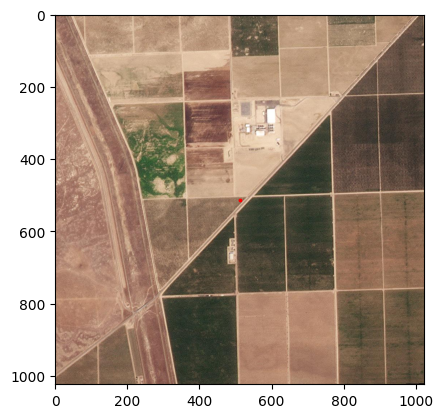

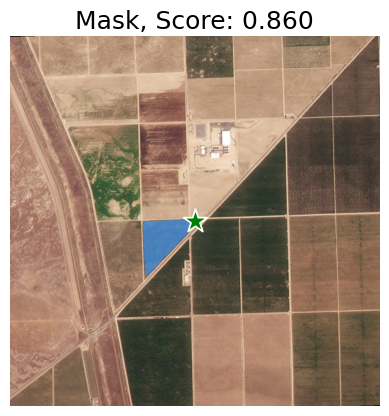

In [ ]:
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/second_try_epoch4-f89-ckpt.pth')
# mask_generator = SamAutomaticMaskGenerator(sam)
# sam = sam_model_registry['vit_h'](checkpoint='/content/drive/MyDrive/Segment Anything/sam_vit_h_4b8939.pth')
folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_for_PSdownload 2'  # Replace with your folder path

i = 1
# for i in range(14,15):
# image_file_path = jpg_list[i]
image_file_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_highCDL_group_for_PSdownload/153/153-3_psscene_visual/35.76001261196468_-89.19060549576075_2019.0_8.0_275.84043884277.jpg'
image_file_path = '/content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_high_application_191of400_TX_PSdownload/146/146-5_psscene_visual/27.99303889222434_-97.38721174200292_2018.0_6.0_109.89537048339841.jpg'
image_file_path = '/content/drive/MyDrive/Segment Anything/StudySiteCA/low_confidence_386_jpg/36.88003875481898_-120.30902164146003_2022.0_10.0_314.65145874.jpg'

print(i, " ", image_file_path)
# image_file_path = "/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_for_PSdownload 2/228/228_psscene_visual/33.90257685347412_-91.49359124708296_2022.0_8.0_234.9480743408.jpg"

width, height = 1024, 1024
central_point = (width // 2, height // 2)

image = cv2.imread(image_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.scatter(*central_point, c='red', s=3)
plt.show()
if (image.shape[0]!= 1024 & image.shape[1]!= 1024):
  print('Image shape:', image.shape, image_file_path)

predictor = SamPredictor(sam)
predictor.set_image(image)



input_point = np.array([central_point])
input_label = np.array([1])

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
    # multimask_output=True,
)
score = scores[0]
mask = masks[0]

# plt.figure(figsize=(10,10))
plt.imshow(image)
plt.scatter(*central_point, c='red', s=3)
show_mask(mask, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.title(f"Mask, Score: {score:.3f}", fontsize=18)
plt.axis('off')
plt.show()


In [ ]:


# Create a list to store the contour coordinates
contour_list = []

# Find contours in the binary mask
contours = measure.find_contours(mask, 0.5, fully_connected='high')
contours = [max(contours, key=lambda x: x.size)]

# Convert contours to dictionaries with polygon coordinates
for contour in contours:
    x_coords = contour[:, 1].tolist()
    y_coords = contour[:, 0].tolist()
    contour_dict = {
        "shape_attributes": {
            "name": "polygon",
            "all_points_x": x_coords,
            "all_points_y": y_coords
        },
        "region_attributes": {}
    }
contour_list.append(contour_dict)

# Create the final dictionary
# output_dict = {"contours": contour_list}

# Convert the output dictionary to a JSON string without spaces
output_json = json.dumps(contour_list, separators=(",", ":"))




In [ ]:


# Load the GeoTIFF file with geographical information
parts = image_file_path.rsplit('/', 1)
geotiff_path = image_file_path[:-3] + 'tif'
name = parts[1][:-3]+ 'shp'

geotiff_dataset = gdal.Open(geotiff_path)
geotransform = geotiff_dataset.GetGeoTransform()
projection = geotiff_dataset.GetProjection()

# Assuming you have a binary mask stored in a NumPy array
# mask = np.array([[False, False, False, False],
#                  [False, True, True, False],
#                  [False, True, True, False],
#                  [False, False, False, False]])

# Find contours in the binary mask
contours = measure.find_contours(mask, 0.5, fully_connected='high')

# Create shapefile
schema = {'geometry': 'Polygon'}
with fiona.open(f'/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_lowconfidence/{name}', 'w', 'ESRI Shapefile', schema, crs=projection) as output:
    for contour in contours:
        coords = [(int(coord[1]), int(coord[0])) for coord in contour]
        polygon = Polygon(coords)

        # Georeference the polygon using the geotransform
        x_coords = [geotransform[0] + col * geotransform[1] for col in contour[:, 1]]
        y_coords = [geotransform[3] + row * geotransform[5] for row in contour[:, 0]]
        polygon = Polygon(zip(x_coords, y_coords))

        feature = {'geometry': mapping(polygon)}
        output.write(feature)


## convert SAM prediction (based on central point) to .JSON in VGG

In [ ]:

import json
ground_truth_json_path = '/content/drive/MyDrive/Segment Anything/StudySiteCA/high_confidence_435_GT.json'

# Read the JSON file
with open(ground_truth_json_path, 'r') as file:
    ground_truth_json = json.load(file)
name_list = []
for key in ground_truth_json:
    # Extract polygons
    ground_truth_name = ground_truth_json[key]["filename"]
    name_list.append(ground_truth_name)
    # print(ground_truth_name)

In [ ]:
### check if any image is missed.
import os

folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_for_PSdownload 2'  # Replace with your folder path
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_low_application_173of400_TX_for_PSdownload'

folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_high_application_191of400_TX_PSdownload'
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteCA/Boundary_high_application_461of729_CA_PSdownload'
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_low_application_200of329_IL_PSdownload'
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload'
jpg_list=[]
i = 0
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.jpg'):
          # if file in name_list:
            print(os.path.join(root, file))
            jpg_list.append(os.path.join(root, file))
            # jpg_list.append(file)
            print(i)
            i +=1


/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/107/107-9_psscene_visual/39.845008228766595_-89.56811403404045_2019.0_7.0_89.1625061035.jpg
0
/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/103/103-9_psscene_visual/39.71253044723478_-91.19999778299223_2021.0_9.0_180.737159729.jpg
1
/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/10/10-9_psscene_visual/40.79969617421204_-90.55305612369534_2019.0_8.0_0.970153808593.jpg
2
/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/102/102-9_psscene_visual/41.3226147919469_-87.92089053918328_2019.0_8.0_178.7852935791.jpg
3
/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/1/1-9_psscene_visual/37.191430411416384_-88.76876157275997_2019.0_7.0_0.936889648.jpg
4
/content/drive/MyDrive/Segment Anyt

In [ ]:
import os
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteCA/low_confidence_381_jpg'
''
jpg_name=[]
i = 0
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.jpg'):
            print(os.path.join(root, file))
            jpg_name.append(file)
            # jpg_list.append(file)
            print(i)
            i +=1

/content/drive/MyDrive/Segment Anything/StudySiteCA/low_confidence_381_jpg/36.51026733079509_-119.4109808144891_2022.0_8.0_0.356346130371.jpg
0
/content/drive/MyDrive/Segment Anything/StudySiteCA/low_confidence_381_jpg/36.67400623350934_-119.5749098071712_2022.0_8.0_270.604598999.jpg
1
/content/drive/MyDrive/Segment Anything/StudySiteCA/low_confidence_381_jpg/37.706042805196994_-120.84792077948792_2021.0_3.0_90.021696241.jpg
2
/content/drive/MyDrive/Segment Anything/StudySiteCA/low_confidence_381_jpg/37.54898920500241_-120.84661328844787_2018.0_5.0_90.29645437.jpg
3
/content/drive/MyDrive/Segment Anything/StudySiteCA/low_confidence_381_jpg/38.76300858900279_-121.48788419206043_2022.0_8.0_89.4696502685.jpg
4
/content/drive/MyDrive/Segment Anything/StudySiteCA/low_confidence_381_jpg/36.50626575083789_-119.53043856973594_2022.0_8.0_269.0416107177.jpg
5
/content/drive/MyDrive/Segment Anything/StudySiteCA/low_confidence_381_jpg/40.001667310089104_-122.25703938356884_2021.0_4.0_0.47271728515

In [ ]:
i = 0
final_jpg_list = []
for jpg in jpg_name:
    for item in jpg_list:
        if jpg in item:
          final_jpg_list.append(item)
          print(i)
          i += 1
          break  # Break out of the inner loop once a match is found.


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry
from segment_anything import SamPredictor
import numpy as np
from skimage import measure
import fiona
from shapely.geometry import Polygon,Point, mapping
from osgeo import gdal
import json
import numpy as np
import pycocotools
import torch
import matplotlib.pyplot as plt
import cv2
import re
import math

# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/second_try_epoch4-f89-ckpt.pth')
# mask_generator = SamAutomaticMaskGenerator(sam)
sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/third_try_epoch-f10.88-ckpt.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/fifth_try_epoch42-f88-ckpt.pth')
# sam = sam_model_registry['vit_h'](checkpoint='/content/drive/MyDrive/Segment Anything/sam_vit_h_4b8939.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/sam_vit_b_01ec64.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_TX/first-86-ckpt.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_TX/third-88-ckpt.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_CA/epoch-000009-f10.91-ckpt.pth')




folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_highCDL_group_for_PSdownload'  # Replace with your folder path
folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_highCDL_group_for_PSdownload_temp/'
folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_low_application_173of400_TX_for_PSdownload/'
folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_high_application_191of400_TX_PSdownload/'
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteCA/low_confidence_381_jpg/'
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteCA/Boundary_high_application_461of729_CA_PSdownload/'
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_low_application_200of329_IL_PSdownload/'
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/'



output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_highconfidence_third/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_lowconfidence_final/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_highconfidence_temp/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteCA/Boundary_lowconfidence_first/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteCA/Boundary_lowconfidence_raw/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteCA/Boundary_highconfidence_final/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_lowconfidence_raw/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_highconfidence_final/'
# output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_lowconfidence_final/'


if not os.path.exists(output_folder+'/polygon/'):
    os.makedirs(output_folder+'/polygon/')

if not os.path.exists(output_folder+'/vgg_json/'):
    os.makedirs(output_folder+'/vgg_json/')

In [ ]:
i = 0
# for root, dirs, files in os.walk(folder_path):
#     for file in files:
#         if file.endswith('.jpg'):
#           # if i <1:
for image_file_path in jpg_list:
# for image_file_path in final_jpg_list:
            file = image_file_path.rsplit('/', 1)[1]
            # image_file_path = os.path.join(root, file)
            parts = image_file_path.rsplit('/', 1)
            geotiff_path = image_file_path[:-3] + 'tif'
            name = parts[1][:-3]+ 'shp'
            json_name = parts[1][:-3]+ 'json'
            # Define the path where you want to save the JSON file
            json_file_path = output_folder+f'/vgg_json/{json_name}'
            if not os.path.exists(json_file_path):
              print(i, " ", image_file_path)
              # image_file_path = "/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_for_PSdownload 2/228/228_psscene_visual/33.90257685347412_-91.49359124708296_2022.0_8.0_234.9480743408.jpg"
              image = cv2.imread(image_file_path)
              image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

              if (image.shape[0]!= 1024 & image.shape[1]!= 1024):
                print('Image shape:', image.shape, image_file_path)

              predictor = SamPredictor(sam)
              predictor.set_image(image)

              width, height = 1024, 1024
              central_point = (width // 2, height // 2)

              # # 1. Extract the number from the path
              # angle = float(re.findall(r"_([\d\.]+)\.jpg$", image_file_path)[0])

              # # Constants
              # PIXEL_SIZE = 3  # Each pixel is around 3 meters
              # DISPLACEMENT = 50  # Move 50 meters

              # # Calculate displacement in x and y directions based on the angle
              # dx = DISPLACEMENT * math.sin(math.radians(angle)) / PIXEL_SIZE
              # dy = DISPLACEMENT * math.cos(math.radians(angle)) / PIXEL_SIZE

              # # Central point
              # cx, cy = 512, 512

              # # 3. Update the central point
              # new_x = cx + dx
              # new_y = cy - dy

              # central_point = [int(new_x//1), int(new_y//1)]
              input_point = np.array([central_point])
              input_label = np.array([1])

              masks, scores, logits = predictor.predict(
                  point_coords=input_point,
                  point_labels=input_label,
                  multimask_output=False,
                  # multimask_output=True,
              )
              score = scores[0]
              mask = masks[0]

              contours = measure.find_contours(mask, 0.5, fully_connected='high')

              # Create a list to store the contour coordinates
              contour_list = []
              # try:
              target_point = central_point  # y, x



             # 1. Compute the area for each contour
              def contour_area(contour):
                  x = contour[:, 1]
                  y = contour[:, 0]
                  return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

              areas = [contour_area(contour) for contour in contours]
              target_point = central_point  # y, x



              # Check if a point is inside a contour
              def point_in_contour(point, contour):
                  x, y = point[1], point[0]
                  n = len(contour)
                  inside = False
                  p1x, p1y = contour[0]
                  for i in range(1, n + 1):
                      p2x, p2y = contour[i % n]
                      if y > min(p1y, p2y):
                          if y <= max(p1y, p2y):
                              if x <= max(p1x, p2x):
                                  if p1y != p2y:
                                      xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                                  if p1x == p2x or x <= xinters:
                                      inside = not inside
                      p1x, p1y = p2x, p2y
                  return inside

              # Filter contours that contain the target point and compute their areas
              valid_contours = [contour for contour in contours if point_in_contour(target_point, contour)]
              # areas = [contour_area(contour) for contour in valid_contours]


              # If we found any valid contours, plot the largest one
              # if valid_contours:
              #     largest_contour = valid_contours[np.argmax(areas)]
              # else:
              #     largest_contour = None

              if valid_contours:
                  areas = [contour_area(contour) for contour in valid_contours]
                  largest_contour = valid_contours[np.argmax(areas)]
              else:
                  # largest_contour = None
                  largest_contour = max(contours, key=lambda x: x.size)

              # Convert contours to dictionaries with polygon coordinates
              # for contour in contours:
              contour = largest_contour
              x_coords = contour[:, 1].tolist()
              y_coords = contour[:, 0].tolist()
              contour_dict = {
                  "shape_attributes": {
                      "name": "polygon",
                      "all_points_x": x_coords,
                      "all_points_y": y_coords
                  },
                  "region_attributes": {}
              }
              contour_list.append(contour_dict)

              # Create the final dictionary
              # output_dict = {"contours": contour_list}
              # Load the GeoTIFF file with geographical information



              file_size = os.path.getsize(image_file_path) # for making .json format in VGG
              # Convert the output dictionary to a JSON string without spaces
              output_json = json.dumps(contour_list, separators=(",", ":"))
              final_output_json = '{"' + file + str(file_size)+'":{"filename":"' + file \
                  +'","size":' + str(file_size) + ',"regions":' +output_json +',"file_attributes":{}}}'

              # Convert the string to a dictionary
              json_data = json.loads(final_output_json)



              # Open the file for writing and dump the JSON data into it
              with open(json_file_path, 'w') as json_file:
                  json.dump(json_data, json_file)


              geotiff_dataset = gdal.Open(geotiff_path)
              geotransform = geotiff_dataset.GetGeoTransform()
              projection = geotiff_dataset.GetProjection()



              # Proceed if a contour covering the point is found
              if largest_contour is not None:
                  # Create georeferenced polygon
                  polygon = Polygon([(geotransform[0] + x * geotransform[1], geotransform[3] + y * geotransform[5]) for y, x in largest_contour])

                  # Create shapefile
                  schema = {'geometry': 'Polygon'}




                  with fiona.open(output_folder+f'/polygon/{name}', 'w', 'ESRI Shapefile', schema, crs=projection) as output:
                      feature = {'geometry': mapping(polygon)}
                      output.write(feature)
              else:
                  print('No polygon covers the point.')

              i = i +1
              # except:
              #   continue

0   /content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/107/107-9_psscene_visual/39.845008228766595_-89.56811403404045_2019.0_7.0_89.1625061035.jpg
1   /content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/103/103-9_psscene_visual/39.71253044723478_-91.19999778299223_2021.0_9.0_180.737159729.jpg
2   /content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/10/10-9_psscene_visual/40.79969617421204_-90.55305612369534_2019.0_8.0_0.970153808593.jpg
3   /content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/102/102-9_psscene_visual/41.3226147919469_-87.92089053918328_2019.0_8.0_178.7852935791.jpg
4   /content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/1/1-9_psscene_visual/37.191430411416384_-88.76876157275997_2019.0_7.0_0.936889648.jpg
5   /content/drive/MyDriv

In [ ]:
import json
import os

# Folder containing the JSON files
folder_path = output_folder + '/vgg_json'

# Combined data
combined_data = {}

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            # Combine the data
            combined_data.update(data)

# Write the combined data to a new JSON file
output_file_path = output_folder+'/SAM_Prediction_190_final.json'
with open(output_file_path, 'w') as file:
    json.dump(combined_data, file)

print(f'Combined JSON file saved to {output_file_path}')


Combined JSON file saved to /content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_highconfidence_final//SAM_Prediction_190_final.json


In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:



import os

folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/high_confidence_228_jpg'

# List all files in the directory
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

number_of_files = len(files)
print(f"There are {number_of_files} files in the folder.")


There are 227 files in the folder.


In [ ]:
######### only for one image
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry
from segment_anything import SamPredictor
import numpy as np
from skimage import measure
import fiona
from shapely.geometry import Polygon,Point, mapping
from osgeo import gdal
import json
import numpy as np
import pycocotools
import torch
import matplotlib.pyplot as plt
import cv2

# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/second_try_epoch4-f89-ckpt.pth')
# mask_generator = SamAutomaticMaskGenerator(sam)
sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/third_try_epoch-f10.88-ckpt.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/fifth_try_epoch42-f88-ckpt.pth')
# sam = sam_model_registry['vit_h'](checkpoint='/content/drive/MyDrive/Segment Anything/sam_vit_h_4b8939.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/sam_vit_b_01ec64.pth')


folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_highCDL_group_for_PSdownload'  # Replace with your folder path
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_highconfidence_third/'

if not os.path.exists(output_folder+'/polygon/'):
    os.makedirs(output_folder+'/polygon/')

if not os.path.exists(output_folder+'/vgg_json/'):
    os.makedirs(output_folder+'/vgg_json/')

i=1

image_file_path = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_highCDL_group_for_PSdownload/39/39-3_psscene_visual/37.141994354924854_-89.83501174657141_2018.0_7.0_147.3433494567.jpg'
file='37.141994354924854_-89.83501174657141_2018.0_7.0_147.3433494567.jpg'
# image_file_path = "/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_for_PSdownload 2/228/228_psscene_visual/33.90257685347412_-91.49359124708296_2022.0_8.0_234.9480743408.jpg"
image = cv2.imread(image_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if (image.shape[0]!= 1024 & image.shape[1]!= 1024):
  print('Image shape:', image.shape, image_file_path)

predictor = SamPredictor(sam)
predictor.set_image(image)

width, height = 1024, 1024
central_point = (width // 2, height // 2)

input_point = np.array([central_point])
input_label = np.array([1])

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
    # multimask_output=True,
)
score = scores[0]
mask = masks[0]

# Create a list to store the contour coordinates
contour_list = []

# Find contours in the binary mask
contours = measure.find_contours(mask, 0.5, fully_connected='high')
contours = [max(contours, key=lambda x: x.size)]

# Convert contours to dictionaries with polygon coordinates
for contour in contours:
    x_coords = contour[:, 1].tolist()
    y_coords = contour[:, 0].tolist()
    contour_dict = {
        "shape_attributes": {
            "name": "polygon",
            "all_points_x": x_coords,
            "all_points_y": y_coords
        },
        "region_attributes": {}
    }
contour_list.append(contour_dict)

# Create the final dictionary
# output_dict = {"contours": contour_list}
# Load the GeoTIFF file with geographical information
parts = image_file_path.rsplit('/', 1)
geotiff_path = image_file_path[:-3] + 'tif'
name = parts[1][:-3]+ 'shp'
json_name = parts[1][:-3]+ 'json'


file_size = os.path.getsize(image_file_path) # for making .json format in VGG
# Convert the output dictionary to a JSON string without spaces
output_json = json.dumps(contour_list, separators=(",", ":"))
final_output_json = '{"' + file + str(file_size)+'":{"filename":"' + file \
    +'","size":' + str(file_size) + ',"regions":' +output_json +',"file_attributes":{}}}'

# Convert the string to a dictionary
json_data = json.loads(final_output_json)

# Define the path where you want to save the JSON file
json_file_path = output_folder+f'/vgg_json/{json_name}'

# Open the file for writing and dump the JSON data into it
with open(json_file_path, 'w') as json_file:
    json.dump(json_data, json_file)


geotiff_dataset = gdal.Open(geotiff_path)
geotransform = geotiff_dataset.GetGeoTransform()
projection = geotiff_dataset.GetProjection()

# Assuming you have a binary mask stored in a NumPy array
# mask = np.array([[False, False, False, False],
#                  [False, True, True, False],
#                  [False, True, True, False],
#                  [False, False, False, False]])

# Find contours in the binary mask
# Find contours in the binary mask
contours = measure.find_contours(mask, 0.5, fully_connected='high')


# Initialize variables to store largest contour and its area
largest_contour = None
largest_area = 0

point = Point(512, 512)

# Iterate over contours and check which one contains the point
for contour in contours:
    polygon = Polygon(contour)
    if polygon.contains(point):
        # Update largest contour if this one is bigger
        area = polygon.area
        if area > largest_area:
            largest_contour = contour
            largest_area = area

# Proceed if a contour covering the point is found
if largest_contour is not None:
    # Create georeferenced polygon
    polygon = Polygon([(geotransform[0] + x * geotransform[1], geotransform[3] + y * geotransform[5]) for y, x in largest_contour])

    # Create shapefile
    schema = {'geometry': 'Polygon'}




    with fiona.open(output_folder+f'/polygon/{name}', 'w', 'ESRI Shapefile', schema, crs=projection) as output:
        feature = {'geometry': mapping(polygon)}
        output.write(feature)
else:
    print('No polygon covers the point.')



## convert SAM prediction (based on multiple points) to .JSON in VGG

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry
from segment_anything import SamPredictor
import numpy as np
from skimage import measure
import fiona
from shapely.geometry import Polygon,Point, mapping
from osgeo import gdal
import json
import numpy as np
import pycocotools
import torch
import matplotlib.pyplot as plt
import cv2

# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/second_try_epoch4-f89-ckpt.pth')
# mask_generator = SamAutomaticMaskGenerator(sam)
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/third_try_epoch-f10.88-ckpt.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_TX/first-86-ckpt.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/fifth_try_epoch42-f88-ckpt.pth')
# sam = sam_model_registry['vit_h'](checkpoint='/content/drive/MyDrive/Segment Anything/sam_vit_h_4b8939.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/sam_vit_b_01ec64.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_CA/epoch-000009-f10.91-ckpt.pth')

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry
from segment_anything import SamPredictor
import numpy as np
from skimage import measure
import fiona
from shapely.geometry import Polygon,Point, mapping
from osgeo import gdal
import json
import numpy as np
import pycocotools
import torch
import matplotlib.pyplot as plt
import cv2

# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/second_try_epoch4-f89-ckpt.pth')
# mask_generator = SamAutomaticMaskGenerator(sam)
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/third_try_epoch-f10.88-ckpt.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_TX/first-86-ckpt.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/fifth_try_epoch42-f88-ckpt.pth')
# sam = sam_model_registry['vit_h'](checkpoint='/content/drive/MyDrive/Segment Anything/sam_vit_h_4b8939.pth')
sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/sam_vit_b_01ec64.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_IL/epoch-000017-iou0.8248-f10.8816-ckpt.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_CA/epoch-000009-f10.91-ckpt.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_IL/epoch-000010-f10.88-ckpt.pth')


folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteIL/testing'  # Replace with your folder path
# folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteTX/testing'  # Replace with your folder path
# folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteCA/testing'  # Replace with your folder path
# folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteIL/training'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteCA/Validation_firstSAM_final/'
# output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteCA/Validation_rawSAM/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteIL/Validation_rawSAM/'
# output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteIL/Validation_SAM_South/'
# output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteTX/Validation_firstSAM_final/'
# output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteTX/Validation_rawSAM_final/'
# output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteIL/training_SAM_final/'

if not os.path.exists(output_folder+'/polygon/'):
    os.makedirs(output_folder+'/polygon/')

if not os.path.exists(output_folder+'/vgg_json/'):
    os.makedirs(output_folder+'/vgg_json/')


json_file = "/content/drive/MyDrive/Segment Anything/StudySiteTX/test_coco.json"
json_file = "/content/drive/MyDrive/Segment Anything/StudySiteCA/test_coco.json"
json_file = "/content/drive/MyDrive/Segment Anything/StudySiteIL/test_coco.json"
# json_file = "/content/drive/MyDrive/Segment Anything/StudySiteIL/train_coco.json"

# Load the JSON data
with open(json_file, 'r') as f:
    coco_data = json.load(f)

# Access the relevant information from the loaded JSON data
images = coco_data['images']
annotations = coco_data['annotations']
num_images = len(images)

i = 0
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.jpg'):
          # if i <1:

            j = 0
            # while images[j]['file_name'] != file:
            #   j = j +1
            while j < len(images) and images[j]['file_name'] != file:
              j += 1

            if j < 15:
              print(j)


              point_prompt_list = []
              for ann in annotations:
                if ann['image_id'] ==j:
                  input_value  = ann['segmentation']
                  # decoded_value = mask.decode(input_value)
                  x,y = ann['point'][0]
                  id = ann['id']
                  point_prompt_list.append([[x,y],id])


              image_file_path = os.path.join(root, file)
              print(j, " ", image_file_path)
              image = cv2.imread(image_file_path)
              image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

              if (image.shape[0]!= 1024 & image.shape[1]!= 1024):
                print('Image shape:', image.shape, image_file_path)

              predictor = SamPredictor(sam)
              predictor.set_image(image)

              # Create a list to store the contour coordinates
              contour_list = []
              for point in point_prompt_list:
                  input_point = np.array([point[0]])
                  input_id =point[1]
                  # rint(input_id)
                  input_label = np.array([1])

                  masks, scores, logits = predictor.predict(
                      point_coords=input_point,
                      point_labels=input_label,
                      multimask_output=False,
                      # multimask_output=True,
                  )
                  score = scores[0]
                  mask = masks[0]



                  # Find contours in the binary mask
                  contours = measure.find_contours(mask, 0.5, fully_connected='high')
                  # contours = [max(contours, key=lambda x: x.size)]




                  # Create a list to store the contour coordinates
                  # contour_list = []



                # 1. Compute the area for each contour
                  def contour_area(contour):
                      x = contour[:, 1]
                      y = contour[:, 0]
                      return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

                  areas = [contour_area(contour) for contour in contours]
                  target_point = point[0]  # y, x



                  # Check if a point is inside a contour
                  def point_in_contour(point, contour):
                      x, y = point[1], point[0]
                      n = len(contour)
                      inside = False
                      p1x, p1y = contour[0]
                      for i in range(1, n + 1):
                          p2x, p2y = contour[i % n]
                          if y > min(p1y, p2y):
                              if y <= max(p1y, p2y):
                                  if x <= max(p1x, p2x):
                                      if p1y != p2y:
                                          xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                                      if p1x == p2x or x <= xinters:
                                          inside = not inside
                          p1x, p1y = p2x, p2y
                      return inside

                  # Filter contours that contain the target point and compute their areas
                  valid_contours = [contour for contour in contours if point_in_contour(target_point, contour)]



                  # If we found any valid contours, plot the largest one
                  if valid_contours:
                      areas = [contour_area(contour) for contour in valid_contours]
                      largest_contour = valid_contours[np.argmax(areas)]
                  else:
                      # largest_contour = None
                      largest_contour = [max(contours, key=lambda x: x.size)][0]



                  # If we found any valid contours, plot the largest one
                  if valid_contours:
                      areas = [contour_area(contour) for contour in valid_contours]
                      largest_contour = valid_contours[np.argmax(areas)]
                  else:
                      # largest_contour = None
                      largest_contour = [max(contours, key=lambda x: x.size)][0]

                  # Define the size of the corner region to check
                  corner_size = 5

                  # Check the top-left corner
                  if np.any(mask[0:corner_size, 0:corner_size]):
                      largest_contour = np.insert(largest_contour, 0, [0, 0], axis=0)

                  # Check the bottom-right corner
                  elif np.any(mask[-corner_size:, -corner_size:]):
                      largest_contour = np.insert(largest_contour, 0, [1023, 1023], axis=0)

                  # Check the top-right corner
                  elif np.any(mask[0:corner_size, -corner_size:]):
                      largest_contour = np.insert(largest_contour, 0, [0, 1023], axis=0)

                  # Check the bottom-left corner
                  elif np.any(mask[-corner_size:, 0:corner_size]):
                      largest_contour = np.insert(largest_contour, 0, [1023, 0], axis=0)


                  x_coords = largest_contour[:, 1].tolist()
                  y_coords = largest_contour[:, 0].tolist()


                  # Convert contours to dictionaries with polygon coordinates
                  # for contour in contours:
                  # contour = largest_contour
                  # x_coords = contour[0][:, 1].tolist()
                  # y_coords = contour[0][:, 0].tolist()
                  contour_dict = {
                      "shape_attributes": {
                          "name": "polygon",
                          "all_points_x": x_coords,
                          "all_points_y": y_coords
                      },
                      "region_attributes": {},
                      "id":input_id
                  }
                  contour_list.append(contour_dict)

                # Create the final dictionary
                # output_dict = {"contours": contour_list}
                # Load the GeoTIFF file with geographical information
              parts = image_file_path.rsplit('/', 1)
              geotiff_path = image_file_path[:-3] + 'tif'
              name = parts[1][:-3]+ 'shp'
              json_name = parts[1][:-3]+ 'json'


              file_size = os.path.getsize(image_file_path) # for making .json format in VGG
              # Convert the output dictionary to a JSON string without spaces
              output_json = json.dumps(contour_list, separators=(",", ":"))
              final_output_json = '{"' + file + str(file_size)+'":{"filename":"' + file \
                  +'","size":' + str(file_size) + ',"regions":' +output_json +',"file_attributes":{}}}'

              # Convert the string to a dictionary
              json_data = json.loads(final_output_json)

              # Define the path where you want to save the JSON file
              json_file_path = output_folder+f'/vgg_json/{json_name}'

              # Open the file for writing and dump the JSON data into it
              with open(json_file_path, 'w') as json_file:
                  json.dump(json_data, json_file)


              # geotiff_dataset = gdal.Open(geotiff_path)
              # geotransform = geotiff_dataset.GetGeoTransform()
              # projection = geotiff_dataset.GetProjection()

              # # Assuming you have a binary mask stored in a NumPy array
              # # mask = np.array([[False, False, False, False],
              # #                  [False, True, True, False],
              # #                  [False, True, True, False],
              # #                  [False, False, False, False]])

              # # Find contours in the binary mask
              # # Find contours in the binary mask
              # contours = measure.find_contours(mask, 0.5, fully_connected='high')


              # # Initialize variables to store largest contour and its area
              # largest_contour = None
              # largest_area = 0

              # point = Point(512, 512)

              # # Iterate over contours and check which one contains the point
              # for contour in contours:
              #     polygon = Polygon(contour)
              #     if polygon.contains(point):
              #         # Update largest contour if this one is bigger
              #         area = polygon.area
              #         if area > largest_area:
              #             largest_contour = contour
              #             largest_area = area

              # # Proceed if a contour covering the point is found
              # if largest_contour is not None:
              #     # Create georeferenced polygon
              #     polygon = Polygon([(geotransform[0] + x * geotransform[1], geotransform[3] + y * geotransform[5]) for y, x in largest_contour])

              #     # Create shapefile
              #     schema = {'geometry': 'Polygon'}




              #     with fiona.open(output_folder+f'/polygon/{name}', 'w', 'ESRI Shapefile', schema, crs=projection) as output:
              #         feature = {'geometry': mapping(polygon)}
              #         output.write(feature)
              # else:
              #     print('No polygon covers the point.')

            # i = i +1


0
0   /content/drive/MyDrive/Segment Anything/StudySiteIL/testing/composite_40.32133581481716_-89.56520766900127.jpg
1
1   /content/drive/MyDrive/Segment Anything/StudySiteIL/testing/composite_40.50588209363185_-91.21594528413092.jpg
2
2   /content/drive/MyDrive/Segment Anything/StudySiteIL/testing/composite_40.32673526072066_-88.8810008216552.jpg
3
3   /content/drive/MyDrive/Segment Anything/StudySiteIL/testing/composite_40.326508785996275_-88.8799705126181.jpg
4
4   /content/drive/MyDrive/Segment Anything/StudySiteIL/testing/composite_39.96251157165918_-89.44641334823191.jpg
5
5   /content/drive/MyDrive/Segment Anything/StudySiteIL/testing/composite_39.68456825839343_-89.2154645093225.jpg
6
6   /content/drive/MyDrive/Segment Anything/StudySiteIL/testing/composite_40.77911630259031_-88.10767699636916.jpg
7
7   /content/drive/MyDrive/Segment Anything/StudySiteIL/testing/composite_40.32444801348369_-88.47839668931528.jpg
8
8   /content/drive/MyDrive/Segment Anything/StudySiteIL/testing/

In [ ]:
import json
import os

# Folder containing the JSON files
folder_path = output_folder + '/vgg_json'

# Combined data
combined_data = {}

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            # Combine the data
            combined_data.update(data)

# Write the combined data to a new JSON file
output_file_path = output_folder+'/sam_raw_15.json'
# output_file_path = output_folder+'/sam_final_15.json'
with open(output_file_path, 'w') as file:
    json.dump(combined_data, file)

print(f'Combined JSON file saved to {output_file_path}')


Combined JSON file saved to /content/drive/MyDrive/Segment Anything/StudySiteIL/Validation_rawSAM//sam_raw_15.json


In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry
from segment_anything import SamPredictor
import numpy as np
from skimage import measure
import fiona
from shapely.geometry import Polygon,Point, mapping
from osgeo import gdal
import json
import numpy as np
import pycocotools
import torch
import matplotlib.pyplot as plt
import cv2

# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/second_try_epoch4-f89-ckpt.pth')
# mask_generator = SamAutomaticMaskGenerator(sam)
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/third_try_epoch-f10.88-ckpt.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_TX/first-86-ckpt.pth')
# sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/training_South/fifth_try_epoch42-f88-ckpt.pth')
# sam = sam_model_registry['vit_h'](checkpoint='/content/drive/MyDrive/Segment Anything/sam_vit_h_4b8939.pth')
sam = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/Segment Anything/epoch-000017-iou0.8248-f10.8816-ckpt.pth')


folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteTX/testing'  # Replace with your folder path
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteTX/Validation_rawSAM/'

if not os.path.exists(output_folder+'/polygon/'):
    os.makedirs(output_folder+'/polygon/')

if not os.path.exists(output_folder+'/vgg_json/'):
    os.makedirs(output_folder+'/vgg_json/')


json_file = "/content/drive/MyDrive/Segment Anything/StudySiteTX/test_coco.json"

# Load the JSON data
with open(json_file, 'r') as f:
    coco_data = json.load(f)

# Access the relevant information from the loaded JSON data
images = coco_data['images']
annotations = coco_data['annotations']
num_images = len(images)

i = 0
for root, dirs, files in os.walk(folder_path):
    for file in files:
      if file.endswith('.jpg'):
        # if i <1:

            j = 0
            try:
              while images[j]['file_name'] != file:
                j = j +1
              print(j)
            except:
              print('cannot find ',file)
              continue

            point_prompt_list = []
            for ann in annotations:
              if ann['image_id'] ==j:
                input_value  = ann['segmentation']
                # decoded_value = mask.decode(input_value)
                x,y = ann['point'][0]
                id = ann['id']
                point_prompt_list.append([[x,y],id])


            image_file_path = os.path.join(root, file)
            print(j, " ", image_file_path)
            image = cv2.imread(image_file_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            if (image.shape[0]!= 1024 & image.shape[1]!= 1024):
              print('Image shape:', image.shape, image_file_path)

            predictor = SamPredictor(sam)
            predictor.set_image(image)

            # Create a list to store the contour coordinates
            contour_list = []
            for point in point_prompt_list:
                input_point = np.array([point[0]])
                input_id =point[1]
                # rint(input_id)
                input_label = np.array([1])

                masks, scores, logits = predictor.predict(
                    point_coords=input_point,
                    point_labels=input_label,
                    multimask_output=False,
                    # multimask_output=True,
                )
                score = scores[0]
                mask = masks[0]



                # Find contours in the binary mask
                contours = measure.find_contours(mask, 0.5, fully_connected='high')


                # 1. Compute the area for each contour
                def contour_area(contour):
                    x = contour[:, 1]
                    y = contour[:, 0]
                    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

                areas = [contour_area(contour) for contour in contours]
                target_point = point[0]  # y, x



                # Check if a point is inside a contour
                def point_in_contour(point, contour):
                    x, y = point[1], point[0]
                    n = len(contour)
                    inside = False
                    p1x, p1y = contour[0]
                    for i in range(1, n + 1):
                        p2x, p2y = contour[i % n]
                        if y > min(p1y, p2y):
                            if y <= max(p1y, p2y):
                                if x <= max(p1x, p2x):
                                    if p1y != p2y:
                                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                                    if p1x == p2x or x <= xinters:
                                        inside = not inside
                        p1x, p1y = p2x, p2y
                    return inside

                # Filter contours that contain the target point and compute their areas
                # valid_contours = [contour for contour in contours if point_in_contour(target_point, contour)]
                valid_contours = contours
                areas = [contour_area(contour) for contour in valid_contours]


                # If we found any valid contours, plot the largest one
                if valid_contours:
                    largest_contour = valid_contours[np.argmax(areas)]
                else:
                    largest_contour = None



                # Convert contours to dictionaries with polygon coordinates
                # for contour in contours:
                contour = largest_contour
                x_coords = contour[:, 1].tolist()
                y_coords = contour[:, 0].tolist()
                contour_dict = {
                    "shape_attributes": {
                        "name": "polygon",
                        "all_points_x": x_coords,
                        "all_points_y": y_coords
                    },
                    "region_attributes": {}
                }
                contour_list.append(contour_dict)

                # Create the final dictionary
                # output_dict = {"contours": contour_list}
                # Load the GeoTIFF file with geographical information



            file_size = os.path.getsize(image_file_path) # for making .json format in VGG
            # Convert the output dictionary to a JSON string without spaces
            output_json = json.dumps(contour_list, separators=(",", ":"))
            final_output_json = '{"' + file + str(file_size)+'":{"filename":"' + file \
                +'","size":' + str(file_size) + ',"regions":' +output_json +',"file_attributes":{}}}'

              # Convert the string to a dictionary
            json_data = json.loads(final_output_json)
            parts = image_file_path.rsplit('/', 1)
            json_name = parts[1][:-3]+ 'json'
            # Define the path where you want to save the JSON file
            json_file_path = output_folder+f'/vgg_json/{json_name}'
            print(json_file_path)

            # Open the file for writing and dump the JSON data into it
            with open(json_file_path, 'w') as json_file:
                json.dump(json_data, json_file)



cannot find  composite_28.00160095472339_-97.26013191264848.jpg
cannot find  composite_26.258189900188295_-97.94488206000963.jpg
cannot find  composite_28.00903570824521_-97.62742037830377.jpg
cannot find  composite_26.18654211969074_-97.86240038544094.jpg
cannot find  composite_26.30130780823173_-97.66208421763503.jpg
cannot find  composite_26.276041545035827_-97.94517132599937.jpg
cannot find  composite_27.5434238984869_-97.74490032820587.jpg
cannot find  composite_28.93639733294085_-96.39860310779791.jpg
cannot find  composite_26.28346794987389_-97.5169078509102.jpg
cannot find  composite_26.10300582412228_-97.84488042740365.jpg
cannot find  composite_26.378645467418703_-97.87799588804596.jpg
0
0   /content/drive/MyDrive/Segment Anything/StudySiteTX/testing/composite_27.674930431753957_-97.5359626598104.jpg
/content/drive/MyDrive/Segment Anything/StudySiteTX/Validation_rawSAM//vgg_json/composite_27.674930431753957_-97.5359626598104.json
1
1   /content/drive/MyDrive/Segment Anything/

In [ ]:
import json
import os

# Folder containing the JSON files
folder_path = output_folder + '/vgg_json'

# Combined data
combined_data = {}

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            # Combine the data
            combined_data.update(data)

# Write the combined data to a new JSON file
output_file_path = output_folder+'/sam_raw_15.json'
with open(output_file_path, 'w') as file:
    json.dump(combined_data, file)

print(f'Combined JSON file saved to {output_file_path}')


Combined JSON file saved to /content/drive/MyDrive/Segment Anything/StudySiteCA/Validation_rawSAM//sam_raw_15.json


In [ ]:
output_folder

'/content/drive/MyDrive/Segment Anything/StudySiteCA/Validation_rawSAM/'

In [ ]:
coco_gt

In [ ]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
ground_truth_file = '/content/drive/MyDrive/Segment Anything/StudySiteD/Test_new_coco.json'
prediction_file = '/content/drive/MyDrive/Segment Anything/StudySiteD/Test_new_coco.json'

coco_gt = COCO(ground_truth_file)
coco_pred = COCO(prediction_file)
coco_eval = COCOeval(cocoGt=coco_gt, cocoDt=coco_pred, iouType='segm')
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()


loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*


KeyError: ignored

## convert .JSON to Polygon

In [ ]:
file

'27.333505972726044_-97.71501090059586_2019.0_5.0_358.5901184082031.tif'

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
# from segment_anything import sam_model_registry
# from segment_anything import SamPredictor
import numpy as np
from skimage import measure
import fiona
from shapely.geometry import Polygon,Point, mapping
from osgeo import gdal
import json
import numpy as np
import pycocotools
import torch
import matplotlib.pyplot as plt
import cv2


folder_path = '/content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_low_application_173of400_TX_for_PSdownload'  # Replace with your folder path
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteTX/Boundary_high_application_191of400_TX_PSdownload'
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteCA/Boundary_low_application_386of723_CA_PSdownload'
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteCA/Boundary_high_application_461of729_CA_PSdownload'
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_low_application_200of329_IL_PSdownload'
folder_path ='/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload'

output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_lowconfidence_196_GT_polygon_final/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_highconfidence_230_GT_polygon_final/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteD/Boundary_lowconfidence_159_GT_polygon_final/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteCA/Boundary_lowconfidence_381_GT_polygon_final/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteCA/Boundary_highconfidence_435_GT_polygon_final/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_lowconfidence_172_GT_polygon_final/'
output_folder = '/content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_highconfidence_166_GT_polygon_final/'

if not os.path.exists(output_folder+'/polygon/'):
    os.makedirs(output_folder+'/polygon/')


json_file = "/content/drive/MyDrive/Segment Anything/StudySiteD/GT_230_high_group.json"
json_file = "/content/drive/MyDrive/Segment Anything/StudySiteTX/GT_high_184.json"
json_file = "/content/drive/MyDrive/Segment Anything/StudySiteCA/high_confidence_435_GT.json"
json_file = "/content/drive/MyDrive/Segment Anything/StudySiteIL/low_confidence_GT_172of200.json"
json_file = "/content/drive/MyDrive/Segment Anything/StudySiteIL/high_confidence_GT_166of190.json"

# Load the JSON data
with open(json_file, 'r') as f:
    coco_data = json.load(f)

keys = []
for key in coco_data:
  keys.append(key)
i = 0

for root, dirs, files in os.walk(folder_path):
  # if i <1:
    for file in files:
        if file.endswith('.jpg'):

            found_key = None
            for key in keys:
                if coco_data[key]['filename'] == file:
                    found_key = key
            if found_key is None:
                print(f"The key for filename {file} is not found")
            else:
                all_points_x = coco_data[found_key]['regions'][0]['shape_attributes']['all_points_x']
                all_points_y = coco_data[found_key]['regions'][0]['shape_attributes']['all_points_y']
                image_file_path = os.path.join(root, file)
                print(i, " ", image_file_path)
                # Combining the x and y coordinates
                polygon = np.array([all_points_x, all_points_y]).T.reshape((-1, 1, 2)).astype(np.int32)

                # Creating an empty mask with the same size as the original image
                height, width = 1024,1024  # Replace with your actual image size
                mask = np.zeros((height, width), dtype=np.uint8)

                # Filling the polygon area with value 1
                cv2.fillPoly(mask, [polygon], 1)

                parts = image_file_path.rsplit('/', 1)
                geotiff_path = image_file_path[:-3] + 'tif'
                name = parts[1][:-3]+ 'shp'
                json_name = parts[1][:-3]+ 'json'
                geotiff_dataset = gdal.Open(geotiff_path)
                geotransform = geotiff_dataset.GetGeoTransform()
                projection = geotiff_dataset.GetProjection()

                # Assuming you have a binary mask stored in a NumPy array
                # mask = np.array([[False, False, False, False],
                #                  [False, True, True, False],
                #                  [False, True, True, False],
                #                  [False, False, False, False]])

                # Find contours in the binary mask
                # Find contours in the binary mask
                contours = measure.find_contours(mask, 0.5, fully_connected='high')


                # Initialize variables to store largest contour and its area
                largest_contour = None
                largest_area = 0

                point = Point(512, 512)

                # # Iterate over contours and check which one contains the point
                # for contour in contours:
                #     polygon = Polygon(contour)
                #     if polygon.contains(point):
                #         # Update largest contour if this one is bigger
                #         area = polygon.area
                #         if area > largest_area:
                #             largest_contour = contour
                #             largest_area = area

                # Proceed if a contour covering the point is found
                if contours is not None:
                    # Create georeferenced polygon
                    polygon = Polygon([(geotransform[0] + x * geotransform[1], geotransform[3] + y * geotransform[5]) for y, x in contours[0]])

                    # Create shapefile
                    schema = {'geometry': 'Polygon'}




                    with fiona.open(output_folder+f'/polygon/{name}', 'w', 'ESRI Shapefile', schema, crs=projection) as output:
                        feature = {'geometry': mapping(polygon)}
                        output.write(feature)
                else:
                    print('No polygon covers the point.')

                i = i +1



0   /content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/107/107-9_psscene_visual/39.845008228766595_-89.56811403404045_2019.0_7.0_89.1625061035.jpg
1   /content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/103/103-9_psscene_visual/39.71253044723478_-91.19999778299223_2021.0_9.0_180.737159729.jpg
2   /content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/10/10-9_psscene_visual/40.79969617421204_-90.55305612369534_2019.0_8.0_0.970153808593.jpg
3   /content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/102/102-9_psscene_visual/41.3226147919469_-87.92089053918328_2019.0_8.0_178.7852935791.jpg
4   /content/drive/MyDrive/Segment Anything/StudySiteIL/Boundary_high_application_190of323_IL_PSdownload/1/1-9_psscene_visual/37.191430411416384_-88.76876157275997_2019.0_7.0_0.936889648.jpg
5   /content/drive/MyDriv

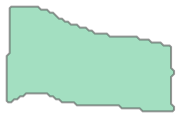

In [ ]:
polygon

In [ ]:
largest_contour

In [ ]:
import json
import os

# Folder containing the JSON files
folder_path = output_folder + '/vgg_json'

# Combined data
combined_data = {}

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            # Combine the data
            combined_data.update(data)

# Write the combined data to a new JSON file
output_file_path = output_folder+'/sam3_15.json'
with open(output_file_path, 'w') as file:
    json.dump(combined_data, file)

print(f'Combined JSON file saved to {output_file_path}')


Combined JSON file saved to /content/drive/MyDrive/Segment Anything/StudySiteD/Image2_validation_thirdSAM//sam3_15.json


# Boundary delineation using SAM

In [ ]:
!pip install python-box
!pip install segment_anything
!pip install lightning
!pip install segmentation_models_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.7/596.7 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.8/728.8 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry
from segment_anything import SamPredictor


In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=100):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))


In [ ]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
# sam = sam_model_registry['vit_h'](checkpoint='/content/drive/MyDrive/Segment Anything/training/epoch-000000-f10.96-ckpt.pth')
# sam = sam_model_registry['vit_h'](checkpoint='/content/drive/MyDrive/Segment Anything/training_point_new/epoch-000000-f10.85-ckpt.pth')
sam = sam_model_registry['vit_h'](checkpoint='/content/drive/MyDrive/Segment Anything/sam_vit_h_4b8939.pth')


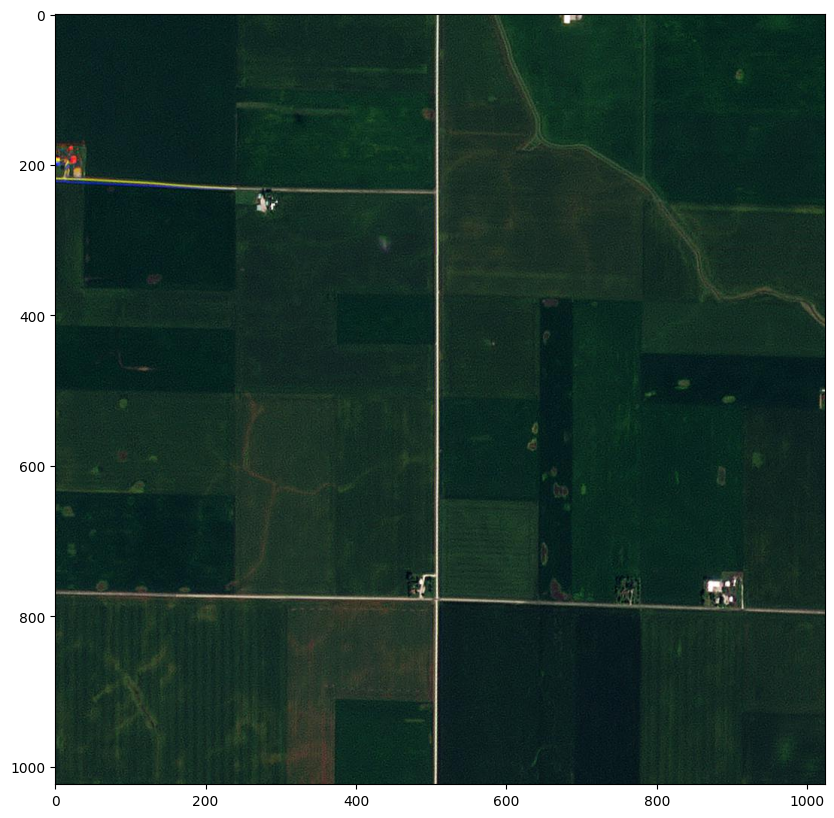

In [ ]:
# image = cv2.imread(f'/content/drive/MyDrive/Segment Anything/image/composite_38.77978842879874_-121.83034166506755.jpg')
image_file = "/content/drive/MyDrive/Segment Anything/IL_PS/25_25/composite_39.71783394958354_-88.7381081887079.jpg"
image = cv2.imread(image_file)
# image = cv2.imread(f'/content/drive/MyDrive/Segment Anything/image/composite_41.084977877603535_-88.66088955151137.jpg')


# image = cv2.imread(f"/content/drive/MyDrive/Crop Classification/Agoro Field Boundary Detector/polygons/composite_38.98303180633731_-121.89475164196925.tif")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()


In [ ]:
# device = "cuda"
# sam.to(device=device)


predictor = SamPredictor(sam)
predictor.set_image(image)


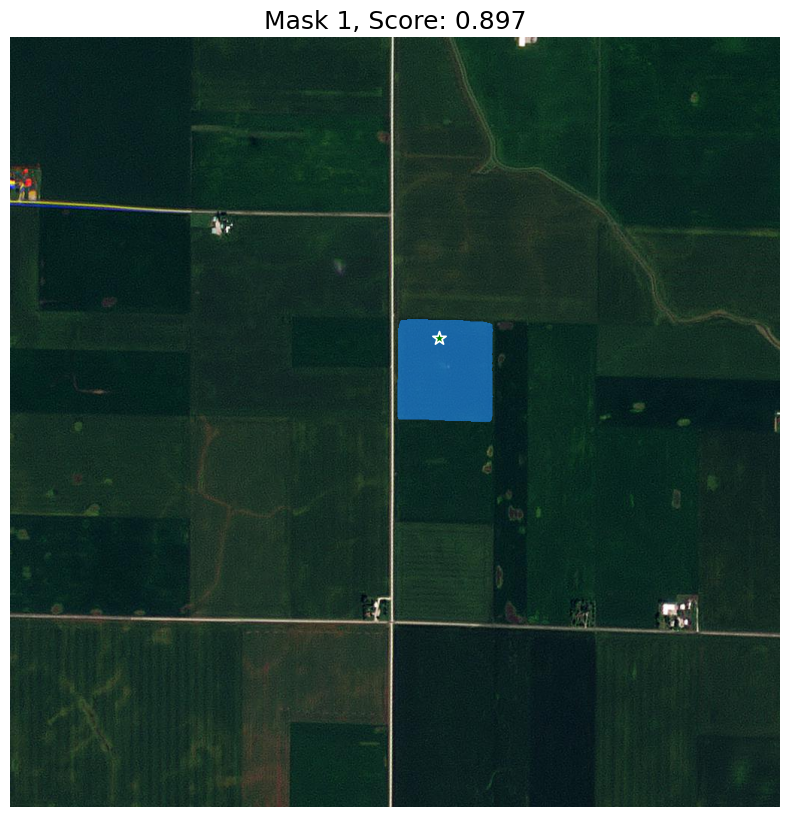

In [ ]:
input_point = np.array([[570,400]])
input_label = np.array([1])

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
    # multimask_output=True,
)

for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 42.7 MB/s eta 0:00:00


In [ ]:
from pycocotools import coco
from pycocotools import mask as maskUtils
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import json
point_json_file ="/content/drive/MyDrive/Segment Anything/IL_PS/18_25/point_test.json"


with open(point_json_file, 'r') as f:
    data = json.load(f)

cx_list = []
cy_list = []

for _, info in data.items():
    for region in info['regions']:
        cx_list.append(region['shape_attributes']['cx'])
        cy_list.append(region['shape_attributes']['cy'])
print("cx_list:", cx_list)
print("cy_list:", cy_list)

cx_list: [73, 190, 182, 67, 310, 297, 409, 423, 463, 470, 569, 597, 575, 678, 668, 767, 755, 852, 1006, 1004, 913, 850, 714, 660, 712, 720, 973, 953, 28, 81, 172, 89, 89, 221, 217, 293, 277, 393, 409, 283, 334, 457, 575, 552, 554, 579, 676, 747, 856, 957, 899, 710, 727]
cy_list: [144, 121, 320, 427, 312, 40, 61, 158, 293, 453, 231, 61, 407, 184, 51, 210, 134, 71, 22, 95, 182, 324, 413, 411, 297, 488, 289, 413, 631, 623, 623, 344, 840, 850, 793, 718, 579, 563, 706, 868, 864, 892, 625, 755, 858, 959, 886, 899, 834, 858, 672, 751, 635]


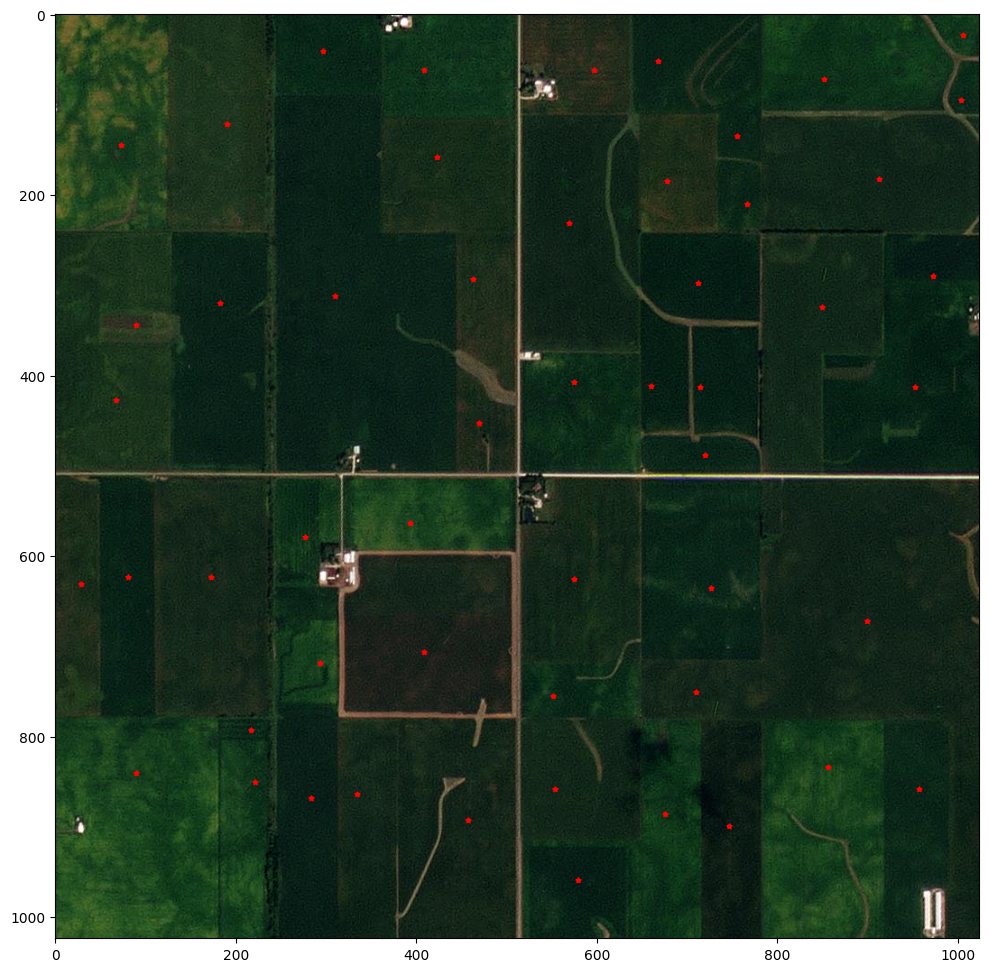

In [ ]:
from pycocotools import coco
from pycocotools import mask as maskUtils
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(12,12))
image_file_path = image_file
image = cv2.imread(image_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
point_prompt_list= []
for i in range(len(cx_list)):
    x = cx_list[i]
    y = cy_list[i]
    point_prompt_list.append([x,y])
    # plt.imshow(decoded_value)
    plt.scatter(x, y, color='green', marker='*', s=12, edgecolor='red', linewidth=1.25)
# image = cv2.imread(f'/content/drive/MyDrive/Segment Anything/image/composite_38.574219630205604_-88.4389042911276.jpg')
image = cv2.imread(image_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.show()

In [ ]:
import numpy as np
from skimage import measure
import fiona
from shapely.geometry import Polygon, mapping
from osgeo import gdal
import json

# Create a list to store the contour coordinates
contour_list = []

for point in point_prompt_list:
  input_point = np.array([point])
  input_label = np.array([1])

  masks, scores, logits = predictor.predict(
      point_coords=input_point,
      point_labels=input_label,
      multimask_output=False,
      # multimask_output=True,
  )
  mask = masks[0]
  # Assuming you have a binary mask stored in a NumPy array
  # mask = np.array([[False, False, False, False],
  #                  [False, True, True, False],
  #                  [False, True, True, False],
  #                  [False, False, False, False]])

  # Find contours in the binary mask
  contours = measure.find_contours(mask, 0.5, fully_connected='high')
  contours = [max(contours, key=lambda x: x.size)]

  # Convert contours to dictionaries with polygon coordinates
  for contour in contours:
      x_coords = contour[:, 1].tolist()
      y_coords = contour[:, 0].tolist()
      contour_dict = {
          "shape_attributes": {
              "name": "polygon",
              "all_points_x": x_coords,
              "all_points_y": y_coords
          },
          "region_attributes": {}
      }
  contour_list.append(contour_dict)

  # Convert the list of dictionaries to a JSON string
  json_string = json.dumps(contour_list)

  # Remove spaces from the JSON string
  json_string_without_spaces = json_string.replace(" ", "")
  json_string_without_spaces




In [ ]:
json_file = "/content/drive/MyDrive/Segment Anything/IL_PS/18_25/18_25.json"
with open(json_file, 'r') as f:
    data = json.load(f)

regions = []
new_regions = output_json
# Replace the "regions" section with the new regions
for key, value in data.items():
    if "regions" in value:
        value["regions"] = json.loads(json_string_without_spaces)
# Convert the modified dictionary back to a JSON string
updated_json_data = json.dumps(data)
print(updated_json_data)
# Save the updated JSON data to a file
with open("/content/drive/MyDrive/Segment Anything/IL_PS/18_25/18_25_new.json", "w") as file:
    json.dump(data, file)

{"composite_40.86205581861687_-88.39418021875777.jpg141426": {"filename": "composite_40.86205581861687_-88.39418021875777.jpg", "size": 141426, "regions": [{"shape_attributes": {"name": "polygon", "all_points_x": [123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 124.0, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.0, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 124.0, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.5, 124.0, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 123.5, 12